## Programming of Data Analysis Project 1

**Francesco Troja**

***

Project 1

>Create a data set by simulating a real-world phenomenon of your choosing. Then rather than collect data related to the phenomenon, you should model and synthesise such data using Python.We suggest you use the numpy.random package for this purpose. Specifically, in this project you should:
>- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
>- Investigate the types of variables involved, their likely distributions, and their relationships with each other.
>- Synthesise/simulate a data set as closely matching their properties as possible.
>- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.


## Contents

1. [Introduction](#introduction)
2. [Import Python Libraries](#Import-Python-Libraries)
3. [Importing the Dataset](#Importing-the-Dataset)
4. [Data Exploration](#Data-Exploration)
5. [Statistical information](#Statistical-information)
6. [Categorical Variables](#Categorical-Variables)
7. [Numerical Variables](#Numerical-Variables)
8. [Gamma Distribution](#Gamma-Distribution)
9. [Normal Distribution](#Normal-Distribution)
10. [Rayleigh Distribution](#Rayleigh-Distribution)
11. [Bivariate Analysis](#Bivariate-Analysis)
12. [Relationships Between Numerical and Categorical Variables](#Relationships-Between-Numerical-and-Categorical-Variables)
13. [Simulate the data set](#Simulate-the-data-set)
14. [Original Vs Simulated Dataset](#Original-Vs-Simulated-Dataset)
15. [Conclusions](#Conclusions)
16. [References](#references)
17. [Additional readings](#Additional-readings)

#### Introduction

The structure of this dataset is designed to facilitate the understanding of factors that significantly contribute to the increase in property prices. Each row represents a unique property, and the columns provide information about different aspects of the property. Through data exploration, the goal is to identify which features are most crucial in determining the increase in the price of a property. Understanding these relationships can provide insights into the real estate market and guide stakeholders in making informed decisions.

#### Import Python Libraries

To execute this project, several Python libraries have been utilized. These libraries were chosen for their specific functionalities and capabilities, tailored to the requirements of the project:
1. `padas`: The library's powerful data structures, including DataFrames and Series, allowed for efficient organization and structuring of data, making it easy to perform various data operations, such as filtering, grouping, and aggregating.Pandas offered a wide range of functions for data cleaning and preparation, making it ideal for addressing real-world data challenges[1].
2. `matplotlib.pyplot`: It is a widely used library for data visualization in Python. It provides a flexible and comprehensive set of tools to create various types of plots and charts. Its versatility allows to create bar charts, line plots, scatter plots, histograms, and more, making it an essential tool for exploratory data analysis and presentation of findings[2].
3. `numpy`: It is imported in this context for its extensive capabilities in numerical and statistical operations. Numpy provides a wide range of probability distributions, functions for generating random numbers following these distributions, and tools for statistical calculations[3].
4. `scipy.stats`: It includes an extensive array of statistical functionalities, covering various aspects of probability and data analysis. It includes a diverse set of probability distributions, facilitating the modeling of different random variables. Moreover, the module provides tools for generating summary and frequency statistics, allowing for a comprehensive understanding of dataset characteristics[4].
5. `seaborn`: Seaborn is a powerful Python data visualization library based on Matplotlib. It is designed to work seamlessly with Pandas DataFrames and provides a high-level interface for drawing attractive and informative statistical graphics[5]. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# for multinomial distribution
from scipy.stats import multinomial
import seaborn as sns
# to check if the ditribution is symmetric or asymmetric
from scipy.stats import skew


#### Importing the Dataset

The dataset includes a wide range of variables, including the *price*, *area in $ft^2$*, *number of bedrooms*, *bathrooms*, *parking* etc.. These variables offer a rich source of information for analysis, allowing for the examination of various aspects of the property market.

The dataset used was was discovered on the [Kaggle](https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction/data) website.

In Python, working with CSV files often involves using the `read_csv()` function from the Pandas library. This function acts as a crucial tool, facilitating the smooth import of CSV files into a Pandas DataFrame. The DataFrame represents the data in a structured format, enabling easy manipulation and analysis. The DataFrame format, offered by Pandas, facilitates straightforward data exploration, manipulation, and analysis. In order to import the csv file, the file path is passed as parameter. This file path specifies the location of the CSV file you want to import. The `read_csv()` function then reads the data from that file and converts it into a Pandas DataFrame[7].

In [2]:
# importing the dataset
df = pd.read_csv("Housing.csv")

print (f'The dataset used is:')
df

The dataset used is:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


#### Data Exploration

Let's investigate the dataset's  structure and characteristics. Statistical analysis is a method for uncovering patterns and correlations in data. The goal is to provide a descriptive overview of the dataset and its variables. Let's have a look at the dataset's contents:

- The Pandas `head()` method is used to return the top n (default is 5) rows from a dataset.
- The Pandas `tail()` method is used to return the bottom n (default is 5) rows from a dataset[8].


In [3]:
print("the first 5 rows of the dataset:")
df.head()


the first 5 rows of the dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
print("the last 5 rows of the dataset:")
df.tail()

the last 5 rows of the dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


As evident from the provided code, the selected dataset comprises **544 rows** and **13 columns**. The dimensionality of the dataset, can be confirmed using the Pandas function `shape` that when used it returns a tuple where the first element represents the number of rows (observations) and the second element indicates the number of columns (variables) in the dataset[9].

In [5]:
print(f'The dimensions of the dataset are: {df.shape}')
print(f'The number of row are: {df.shape[0]}')
print (f'The number of Attributes are: {df.shape[1]}')

The dimensions of the dataset are: (545, 13)
The number of row are: 545
The number of Attributes are: 13


To gain further insights into the DataFrame, the `info()` function can be used. This function provides metadata about the DataFrame, including the column names, the count of non-null values in each column, and the data type for each column[10]:

In [6]:
print('Find below the full summary of the Dataset:\n')
df.info()

Find below the full summary of the Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


The analysis of the dataset reveals the following key findings:

1. The dataset consists of **13 columns**:
   - **Price**: The price of the house.
   - **Area**: The total area of the house in square feet.
   - **Bedrooms**: The number of bedrooms in the house.
   - **Bathrooms**: The number of bathrooms in the house.
   - **Stories**: The number of stories in the house.
   - **Mainroad**: Whether the house is connected to the main road (Yes/No).
   - **Guestroom**: Whether the house has a guest room (Yes/No).
   - **Basement**: Whether the house has a basement (Yes/No).
   - **Hot water heating**: Whether the house has a hot water heating system (Yes/No).
   - **Airconditioning**: Whether the house has an air conditioning system (Yes/No).
   - **Parking**: The number of parking spaces available within the house.
   - **Prefarea**: Whether the house is located in a preferred area (Yes/No).
   - **Furnishing status**: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished) [(Kaggle)](https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction/data).

2. The dataset is composed of a mix of data types. Specifically, there are *7 columns* with *object data types* (string of Text or mixed numeric and non-numeric values) and *6 numerical columns*(Integer), which likely contain numeric information[11].

The analysis will now shift to examining the missing values and duplicate rows within the variables of the dataset. To determine the precise count of rows with null values, `isnull()` function can be used. The function identifies and flags the presence of missing or null values in the dataset. To determine how many missing values exist for each variable the `sum()` function can be chained on the `isnull()`[12]. This understanding is essential before proceeding with further data analysis and allows for informed decision-making regarding how to handle these null value rows[13].

In [7]:
print('The missing values are:')
df.isnull().sum()

The missing values are:


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

The presence of duplicate rows in the dataset is assessed using the `duplicated()` function in conjunction with `sum()`. This combination of functions allows for the identification of duplicate rows by summing up the boolean values returned by `duplicated()`. A non-zero sum indicates the existence of duplicate rows in the dataset[14].

In [8]:
print(f'The number of Duplicated Rows is: {df.duplicated().sum()}')


The number of Duplicated Rows is: 0


The result of this analysis reveals that there are no missing values or duplicated rows present in the dataset. In General, identifying and understanding the nature of missing data is a critical aspect of data preparation. Depending on the goals of the analysis, various actions can be taken with missing values, including imputation (filling in missing values with estimated or calculated data) or employing data cleaning techniques to ensure the dataset's quality and suitability for the intended analysis[15].

#### Statistical information

In the process of analyzing a dataset, another step involves determining the type of variable associated with each attribute. One fundamental property of variables is their level or scale of measurement, which dictates the permissible arithmetic operations and, consequently, specifies the applicable statistical tests. In statistics, there are four primary levels of measurement: **nominal**, **ordinal**, **interval**, and **ratio**. These levels are hierarchical, with each level possessing all the characteristics of the previous levels, and some additional features[16].

- **Nominal Scale**: This is the lowest level of measurement, indicating that variables possess distinct values, but no meaningful order can be established among them. When there are only two categories, such as gender, it is referred to as dichotomous or binary.
- **Ordinal Scale**: Positioned one level higher, the ordinal scale encompasses nominal information but allows for the establishment of a ranking. However, the distances between values are not interpretable, making it impossible to quantify the absolute distance between two values[17].

Variables with a nominal or ordinal scale are often termed **categorical variables** while Variables with ordinal,interval and Ratio scale are **Continuous Variable**[17].

- **Ordinal variables**, categorize information with a clear sense of order or ranking. However, it's important to emphasize that the intervals or gaps between these categories are not uniform or quantifiable. For example, consider customer satisfaction ratings such as "poor," "fair," "good," and "excellent." While these categories can be ranked, the differences between them are not consistent and cannot be precisely measured. Ordinal scales allow for the establishment of a ranking, indicating higher or lower positions, but they do not provide a basis for making detailed numerical comparisons[18].
- **Interval Variables**: This category permits the application of a wide array of statistical measures. However, it's essential to note that these measures cannot assume the existence of a 'true' zero point. On an interval scale, the zero point is a matter of convention rather than an absolute marker. For instance, Centigrade and Fahrenheit temperature scales both exhibit equal intervals of temperature defined by considering equal volumes of expansion. Yet, each scale establishes an arbitrary zero point, and numerical values from one scale can be translated into equivalent values on the other using a specific mathematical equation. The critical idea is that interval variables maintain their properties regardless of the choice of the zero point, as long as consistent transformations are applied[19].
- **Ratio Variables**: Representing the highest level of precision among all scales, ratio data is a subset of quantitative data. Unlike interval data, ratio data possesses a distinctive attribute: the presence of a "true zero." A zero measurement on a ratio scale is absolute, signifying that ratio data can never be negative. This characteristic enables the full range of mathematical operations, including addition, subtraction, multiplication, and division, during statistical analyses[20].

#### Categorical Variables

For categorical data, a common summary measure is the count of observations for a specific category or percentage that each category contributes to the entire dataset. To visually represent this information, a frequency table can be utilized, often accompanied by a bar chart or pie chart. A frequency table displays the occurrence of each unique value within a column, providing both tabular and graphical representations[21].

To identify the distinct values of categorical variables within the dataset, the Pandas `unique()` function can be employed. This function returns an array containing the unique values found in a specified column. For instance[22]:

In [9]:
# create a list that includes all the categorical variables
cat_var = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for variable in cat_var:
    unique_value = df[variable].unique()
    print(f'\nUnique {variable} in the dataset:\n', unique_value)


Unique mainroad in the dataset:
 ['yes' 'no']

Unique guestroom in the dataset:
 ['no' 'yes']

Unique basement in the dataset:
 ['no' 'yes']

Unique hotwaterheating in the dataset:
 ['no' 'yes']

Unique airconditioning in the dataset:
 ['yes' 'no']

Unique prefarea in the dataset:
 ['yes' 'no']

Unique furnishingstatus in the dataset:
 ['furnished' 'semi-furnished' 'unfurnished']


let's move on with the analysis. To obtain the count of unique values for a categorical variable, the function [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) can be used. This function provides a series containing counts of unique values in descending order.

In [10]:
cat_var = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


for variable in cat_var:
    count = df[variable].value_counts()
    print (f'\nValue counts for column:\n {count}')


Value counts for column:
 mainroad
yes    468
no      77
Name: count, dtype: int64

Value counts for column:
 guestroom
no     448
yes     97
Name: count, dtype: int64

Value counts for column:
 basement
no     354
yes    191
Name: count, dtype: int64

Value counts for column:
 hotwaterheating
no     520
yes     25
Name: count, dtype: int64

Value counts for column:
 airconditioning
no     373
yes    172
Name: count, dtype: int64

Value counts for column:
 prefarea
no     417
yes    128
Name: count, dtype: int64

Value counts for column:
 furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


Now, let's proceed to visualize the distribution of categorical data by plotting a pie chart. This graphical representation will illustrate the percentage contribution of each category to the overall dataset.

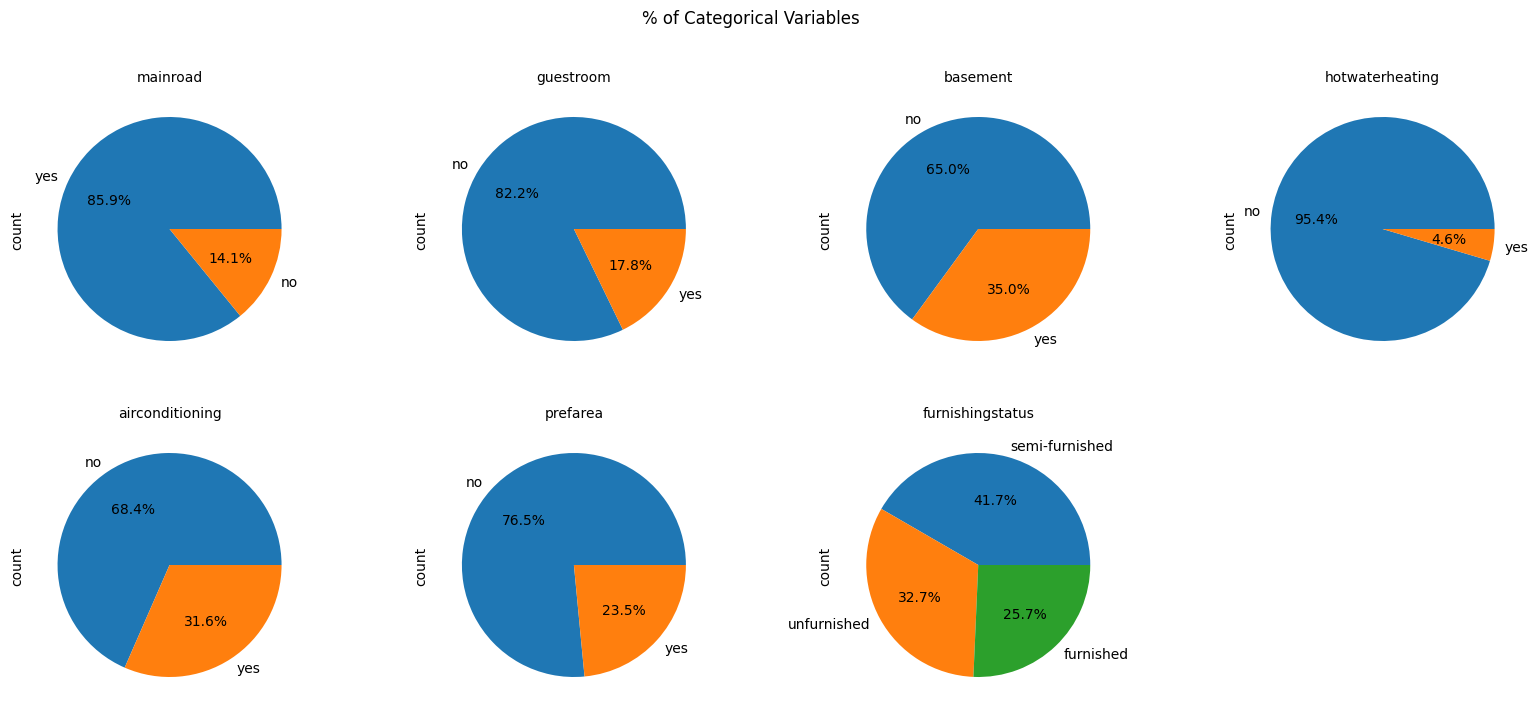

In [11]:
mroad_value = df.mainroad.value_counts()
guestroom_value = df.guestroom.value_counts()
basem_value = df.basement.value_counts()
hotwater_value = df.hotwaterheating.value_counts()
aricond_value = df.airconditioning.value_counts()
prefarea_value = df.prefarea.value_counts()
furn_value = df.furnishingstatus.value_counts()


fig = plt.figure(figsize=(20, 8)) # create a figure with a 20 width, 8 length

ax1 = plt.subplot(241)  # subplot with 2 rows, 4 columns, the 1st one
ax2 = plt.subplot(242)  # subplot with 2 rows, 4 columns, the 2nd one
ax3 = plt.subplot(243)  # subplot with 2 rows, 4 columns, the 3rd one
ax4 = plt.subplot(244)  # subplot with 2 rows, 4 columns, the 4th one
ax5 = plt.subplot(245)  # subplot with 2 rows, 4 columns, the 5th one
ax6 = plt.subplot(246)  # subplot with 2 rows, 4 columns, the 6th one
ax7 = plt.subplot(247)  # subplot with 2 rows, 4 columns, the 7th one


mroad_value.plot(kind='pie', x=mroad_value, y = mroad_value.index, autopct='%1.1f%%', ax= ax1)
guestroom_value.plot(kind='pie', x=guestroom_value, y = guestroom_value.index, autopct='%1.1f%%', ax= ax2)
basem_value.plot(kind='pie', x=basem_value, y = basem_value.index, autopct='%1.1f%%', ax= ax3)
hotwater_value.plot(kind='pie', x=hotwater_value, y = hotwater_value.index, autopct='%1.1f%%', ax= ax4)
aricond_value.plot(kind='pie', x=aricond_value, y = aricond_value.index, autopct='%1.1f%%', ax= ax5)
prefarea_value.plot(kind='pie', x=prefarea_value, y = prefarea_value.index, autopct='%1.1f%%', ax= ax6)
furn_value.plot(kind='pie', x=furn_value, y = furn_value.index, autopct='%1.1f%%', ax= ax7)

ax1.set_title('mainroad',  fontsize=10)
ax2.set_title('guestroom',  fontsize=10)
ax3.set_title('basement', fontsize=10)
ax4.set_title('hotwaterheating', fontsize=10)
ax5.set_title('airconditioning', fontsize=10)
ax6.set_title('prefarea', fontsize=10)
ax7.set_title('furnishingstatus', fontsize=10)
plt.suptitle('% of Categorical Variables')
plt.savefig("percentage of categorical variable")
plt.show()


The two primary probability distributions commonly used for categorical variables are the **binomial** and **multinomial** distributions. The **binomial distribution** is used in scenarios involving *binary categorical variables*, where only two potential outcomes, such as success or failure, exist. On the other hand, the **multinomial distribution** exhibits greater versatility and finds application in situations where categorical variables include *more than two categories*. This flexibility allows the multinomial distribution to model the probabilities associated with various outcomes within a single trial, making it well-suited for scenarios involving multiple categories[23].

The multinomial distribution key characteristics and properties:
- *Fixed Number of Trials $n$*;
- *Probability Vector $P$ where each element in the vector represents the probability of one of the possible outcomes*;
- *Trials are independent of each other meaning that the outcome of one trial does not affect the outcomes of subsequent trials.*

The result of the multinomial distribution provides a simulated random sample of occurrences for each category based on the specified probabilities. Each row in the resulting dataset corresponds to a category, and the "**Observed**" column represents the number of occurrences for each category in the simulated sample[24].


In [12]:
furnishing_counts = df['furnishingstatus'].value_counts()
furnishing_probabilities = (df['furnishingstatus'].value_counts() / len(df)).values

num_trials = 1000

# Calculate the probability for each furnishing status category
multinomial = np.random.multinomial(num_trials, furnishing_probabilities)

# Create a DataFrame to display the results
result_df = pd.DataFrame({'Furnishing Status': furnishing_counts.index, 'Observed': multinomial})

# Print the result
result_df

,Furnishing Status,Observed
0,semi-furnished,424
1,unfurnished,325
2,furnished,251


Let's proceed with visualizing the multinomial distribution associated with the Furnishing Status attribute:

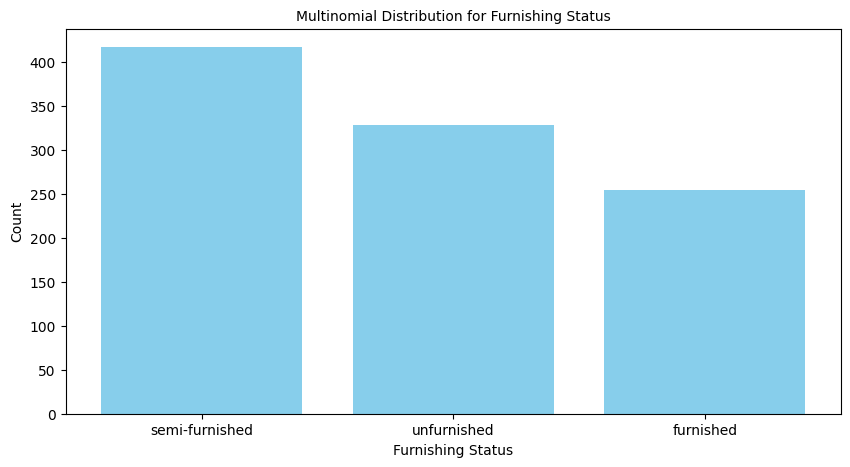

In [13]:
furnishing_categories = df['furnishingstatus'].value_counts()
furnishing_probabilities = (df['furnishingstatus'].value_counts() / len(df)).values

num_trials = 1000 

multinomial_samples = np.random.multinomial(num_trials, furnishing_probabilities)

# Create bar charts to visualize the multinomial distribution
plt.figure(figsize=(10, 5))

plt.bar(furnishing_categories.index, multinomial_samples, color='skyblue')
plt.title("Multinomial Distribution for Furnishing Status", fontsize=10)
plt.xlabel("Furnishing Status")
plt.ylabel("Count")
plt.savefig("Multinomial distribution for Categorical Variable")
plt.show()


*Mainroad*, *guestroom*, *basement*, *hotwaterheating*, *airconditioning* and *prefarea* provide an example where the binomial distribution is applicable. Much like the Multinomial distribution, the binomial distribution operates under the assumptions of a fixed number of trials or events, denoted as $n$, and the independence of each trial or event. Within this distribution, a probability $p$ indicates the likelihood of success, such as the probability of a property having a basement in the context of basement attribute. Consequently, the probability of failure is represented as $1−p$. The binomial distribution is primarily employed to model the count of successes, such as the count of basement in the house, within the specified number of trials[25].

To find the accurate probability percentage for the binomial distribution the below formula is used[26]:

$${Probability} = \frac{\text{total number of outcomes}}{\text{number of desired outcomes}}$$

In the dataset, if we take as example the mainroad attribute, the above formula can be interpreted as: $P = \frac{468}{545} = 0.85$, where 468 is thhe total number of house that face in a mairoad and 545 is the total number of row in the dataset.

In [14]:
cat_var = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
probabilities = {'mainroad': 0.85, 'guestroom': 0.82, 'basement': 0.35, 'hotwaterheating': 0.35, 'airconditioning': 0.04, 'prefarea': 0.23}
n = 1000  # Number of trials
success = 1  # Number of successes in each trial

# Create an empty dictionary to store probabilities for each category
result_probabilities = {}

# Loop through each category and calculate the probability of success
for category in cat_var:
    p = probabilities[category]
    # Generate random samples using the binomial distribution
    category_prob = sum(np.random.binomial(n=success, p=p, size=n) == 1) / n
    result_probabilities[category] = category_prob

# Print the probabilities for each category
for category, prob in result_probabilities.items():
    print(f'The probability to successfully choose {category} is {prob:.2%}')

The probability to successfully choose mainroad is 83.70%
The probability to successfully choose guestroom is 79.90%
The probability to successfully choose basement is 36.40%
The probability to successfully choose hotwaterheating is 32.50%
The probability to successfully choose airconditioning is 4.30%
The probability to successfully choose prefarea is 20.90%


Let's viualize the *Binomial Distribution* with the *Kernel Density Estimate (KDE)*.  **Histograms** are great for displaying the frequency or count of data within specific bins but can appear jagged based on bin sizes. By incorporating **KDE**, we create a *smoother estimation* of the probability density function, which provides a more polished and continuous representation of the distribution. This smoother plot enhances the visualization, making it easier to grasp the distribution's shape, central tendency, and spread. KDE is particularly valuable for detecting modes (peaks), skewness, or multimodal characteristics that might not be immediately evident in a standard histogram[27].

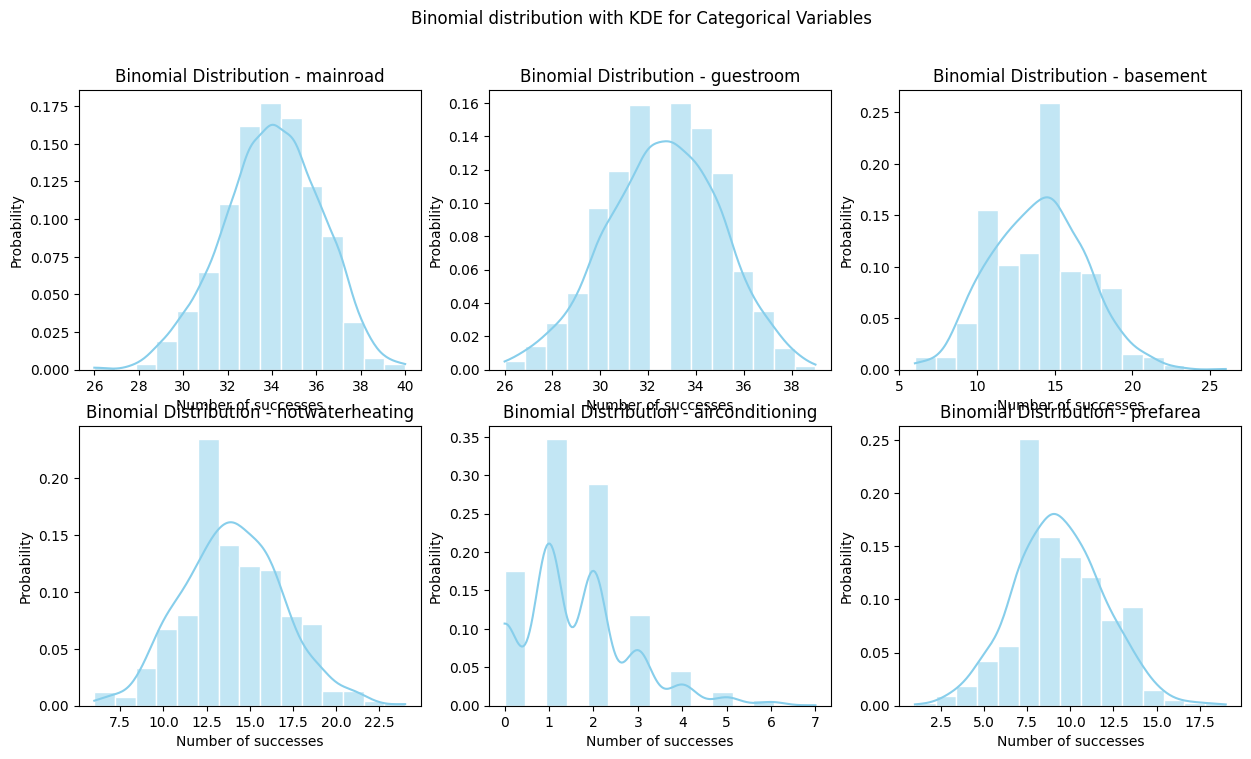

In [15]:
cat_var = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
probabilities = {'mainroad': 0.85, 'guestroom': 0.82, 'basement': 0.35, 'hotwaterheating': 0.35, 'airconditioning': 0.04, 'prefarea': 0.23}
n = 1000  # Number of trials
success = 40  # Number of successes in each trial

plt.figure(figsize=(15, 8))

for i, category in enumerate(cat_var, 1):
    plt.subplot(2, 3, i)
    p = probabilities[category]
    binomial_samples = np.random.binomial(n=success, p=p, size=n)
    sns.histplot(x=binomial_samples, bins=15, stat='probability', kde=True, color='skyblue', edgecolor='white', alpha=0.5)
    plt.title(f'Binomial Distribution - {category}')
    plt.xlabel('Number of successes')
    plt.ylabel('Probability')

plt.suptitle("Binomial distribution with KDE for Categorical Variables")
plt.savefig("Binomial distribution with KDE for Categorical Variables")
plt.show()


#### Numerical Variables

For numerical variables, the `describe()` function is used to provide a comprehensive summary of key statistical measures. When applied to a numerical variable in a dataset, `describe()` furnishes the following information: Count (The number of non-null observations), **Mean**(The average value, indicating the central tendency), **Standard Deviation** (A measure of the dispersion or spread of the data), **Minimum** (The smallest observed value in the dataset), **25th/50th/75th Percentile** (The value below which 25%/50%/75% of the data falls), **Maximum** (The largest observed value in the dataset)[28].

In [16]:
stat_info = round(df.describe(),1)

print(f'The Statistical information of the Numerical variables are:')
stat_info

The Statistical information of the Numerical variables are:


,price,area,bedrooms,bathrooms,stories,parking
count,545.0,545.0,545.0,545.0,545.0,545.0
mean,4766729.2,5150.5,3.0,1.3,1.8,0.7
std,1870439.6,2170.1,0.7,0.5,0.9,0.9
min,1750000.0,1650.0,1.0,1.0,1.0,0.0
25%,3430000.0,3600.0,2.0,1.0,1.0,0.0
50%,4340000.0,4600.0,3.0,1.0,2.0,0.0
75%,5740000.0,6360.0,3.0,2.0,2.0,1.0
max,13300000.0,16200.0,6.0,4.0,4.0,3.0


The statistical summary provides key insights into the dataset. For instance, the mean house price is approximately 4.77 million, with an average area of around 5150 square feet. Additionally, the summary reveals that the minimum values for bedrooms, bathrooms, and stories are all 1, while the maximum values range between 4 and 6. Furthermore, the summary indicates that having a parking spot may not be considered essential, as there are houses without parking. The maximum number of parking spots found in a house is no more than 3.

As previously mentioned, **categorical variables** can be effectively visualized using various methods, including *Count plots*, *Bar Charts*, *Pie Plots*, etc. These visualizations offer insights into the distribution and frequency of different categories within the dataset, providing a clear representation of categorical data. On the other hand, **numerical variables** are best visualized through techniques such as *histograms*, *Box Plots*, and *Density Plots*. **Histograms** depict the distribution of numerical data by dividing it into *intervals* or *bins* and illustrating the frequency of observations in each bin. **Box Plots** provide a visual summary of the distribution, *highlighting key statistical measures* such as the median, quartiles, and potential outliers. **Density Plots** offer a smoothed representation of the distribution, facilitating the visualization of *probability density*[29]. 

Plotting the *numerical distribution* along with *skewness* information offers valuable insights into the shape of each numerical variable's distribution. **Skewness**, in essence, quantifies the *asymmetry of a distribution*, indicating how much it deviates from a symmetric or normal distribution. There are different types of skewness:

- **Negative Skewness**: The left tail of the distribution is longer or heavier than the right tail, with a concentration of data points on the right side.
- **Positive Skewness**: The right tail of the distribution is longer or heavier than the left tail, and data points are concentrated on the left side.
- **Zero Skewness**: The distribution is perfectly symmetrical, with both tails being mirror images of each other.

Incorporating skewness information into the plot provides an immediate visual sense of whether the distribution is symmetric or skewed, and in which direction. Understanding skewness aids in comprehending the behavior of the data. For instance, positive skewness in prices might suggest the presence of a few exceptionally expensive properties, influencing the overall distribution[30].

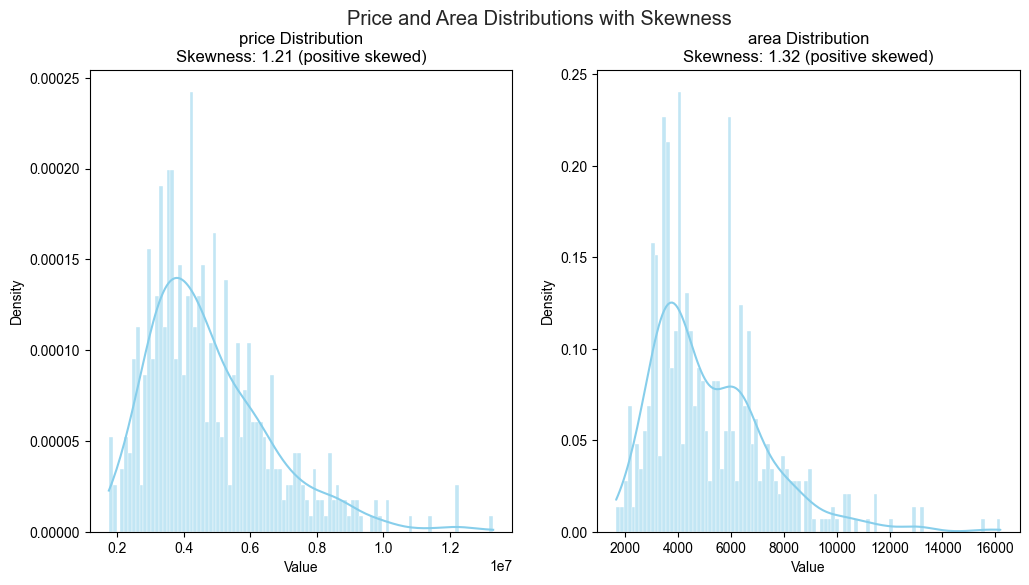

In [17]:
num_variables = ['price', 'area']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()

for i in range(len(num_variables)):
    variable = num_variables[i]
    
    # Select data for the current variable
    data = df[variable]
    
    # Plotting KDE with histogram using Seaborn
    sns.histplot(x=data, bins=100, stat='frequency', kde=True, color='skyblue', edgecolor='white', ax=axes[i])
    sns.set(style="darkgrid")
    
    # Calculate skewness
    skewness = data.skew()
    
    if skewness < 0:
        skewness_label = 'negative skewed'
    elif skewness > 0:
        skewness_label = 'positive skewed'
    else:
        skewness_label = 'The distribution is perfectly symmetrical'
    
    axes[i].set(xlabel='Value', ylabel='Density')
    axes[i].set_title(f'{variable} Distribution\nSkewness: {skewness:.2f} ({skewness_label})')

plt.suptitle("Price and Area Distributions with Skewness")
plt.savefig("Price and Area Distributions with Skewness")
plt.show()

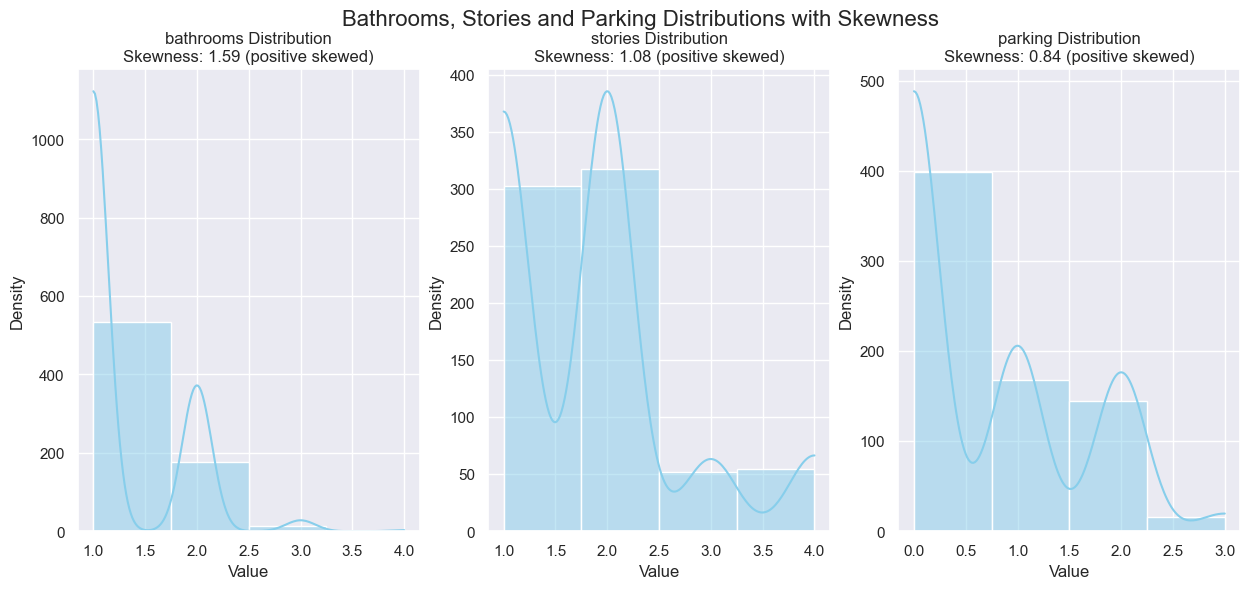

In [18]:
num_variables = ['bathrooms', 'stories', 'parking']

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
axes = axes.flatten()

for i in range(len(num_variables)):
    variable = num_variables[i]
    
    # Select data for the current variable
    data = df[variable]
    
    # Plotting KDE with histogram using Seaborn
    sns.histplot(x=data, bins=4, stat='frequency', kde=True, color='skyblue', edgecolor='white', ax=axes[i])
    sns.set(style="darkgrid")
    
    # Calculate skewness
    skewness = data.skew()
    
    if skewness < 0:
        skewness_label = 'negative skewed'
    elif skewness > 0:
        skewness_label = 'positive skewed'
    else:
        skewness_label = 'The distribution is perfectly symmetrical'
    
    axes[i].set(xlabel='Value', ylabel='Density')
    axes[i].set_title(f'{variable} Distribution\nSkewness: {skewness:.2f} ({skewness_label})')

plt.suptitle("Bathrooms, Stories and Parking Distributions with Skewness", fontsize=16)
plt.savefig("Bathrooms, Stories and Parking Distributions with Skewness")
plt.show()

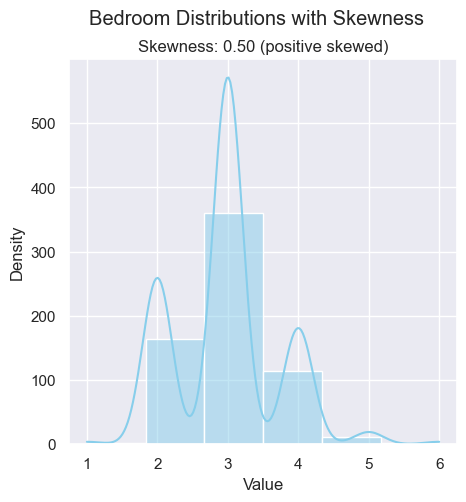

In [19]:
num_variables = ['bedrooms']

fig, axes = plt.subplots(1, figsize=(5, 5))

for i, variable in enumerate(num_variables):
    data = df[variable]
    
    # Plotting KDE with histogram using Seaborn
    sns.histplot(x=data, bins=6, stat='frequency', kde=True, color='skyblue', edgecolor='white', ax=axes)
    sns.set(style="darkgrid")

    # Calculate skewness
    skewness = data.skew()
    
    if skewness < 0:
        skewness_label = 'negative skewed'
    elif skewness > 0:
        skewness_label = 'positive skewed'
    else:
        skewness_label = 'The distribution is perfectly symmetrical'
    
    axes.set(xlabel='Value', ylabel='Density')
    axes.set_title(f'Skewness: {skewness:.2f} ({skewness_label})')

plt.suptitle("Bedroom Distributions with Skewness")
plt.savefig("Bedroom_Distributions_with_Skewness.png")
plt.show()


The above visualization provides a valuable overview of the distribution characteristics of the numerical variables. It suggests that only one out of the six variables closely follows a normal distribution, while the others exhibit patterns similar to a gamma distribution. As we continue to explore and analyze the data, we can delve deeper into the specific properties and implications of these distributions for each variable.

Visualizing raw data provides an initial understanding of its distribution. However, determining the appropriate probability distribution can still be a challenging task. Raw data, by its nature, lacks a defined structure that would readily indicate a specific distribution. This is primarily because raw data can manifest in diverse patterns and shapes, making it challenging to identify a single probability distribution universally fitting for all datasets. The complexity arises from the fact that various distributions, each characterized by distinct features, could potentially describe the data equally well. While visualizing raw data provides preliminary insights, its interpretation remains subjective. Different individuals might perceive patterns differently, and relying solely on visual assessments might not capture all the variations built-in the dataset[31].

Exploring the most suitable probability distribution for the variables can be facilitated using the Python library **Fitter**. This library leverages the capabilities of the scipy library, supporting a wide array of *80 distributions*. The Fitter class within this library systematically scans through these distributions, calling the fit function and providing a summary of the best distributions based on the sum of square errors. It is important to note that this process may take some time, considering the exhaustive search through various distributions. To streamline the process and expedite the analysis, a practical approach is to initially attempt fitting with only the most common distribution. This can be achieved using the `get_common_distribution()` function, which focuses on the 10 most common distributions (**cauchy**, **chi2**, **expon**, **exponpow**, **gamma**, **lognorm**, **norm**, **powerlaw**, **rayleigh**, **uniform**), offering a quicker overview of potential fits[32].

Summary for variable: bedrooms
          sumsquare_error         aic         bic  kl_div  ks_statistic  \
norm           150.437887  562.583540  571.185111     inf      0.284815   
lognorm        150.628157  518.227167  531.129525     inf      0.295936   
gamma          150.629462  521.097538  533.999896     inf      0.295236   
chi2           150.629462  521.097634  533.999991     inf      0.295236   
rayleigh       150.781318         inf         inf     inf      0.300667   

             ks_pvalue  
norm      1.283256e-39  
lognorm   8.430639e-43  
gamma     1.349433e-42  
chi2      1.349243e-42  
rayleigh  3.405043e-44  


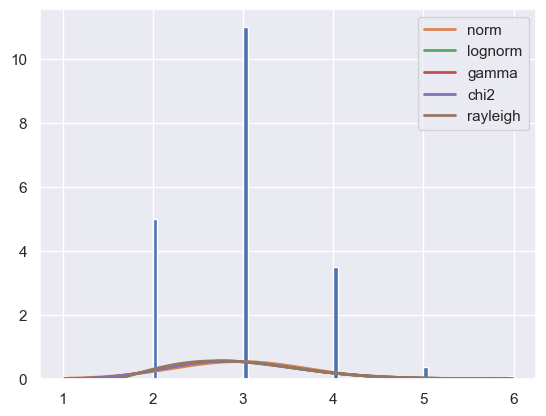

In [20]:
from fitter import Fitter, get_common_distributions

cal_variables = ['bedrooms'] #select one or more variable from ('price', 'area', 'bathrooms', 'stories', 'parking')

for variable in cal_variables:
    # Create Fitter instance for the current variable
    f = Fitter(df[variable], distributions=get_common_distributions())

    # Fit the distributions
    f.fit()

    # Display the summary
    print(f"Summary for variable: {variable}")
    print(f.summary())

The provided code offers a comprehensive insight into the probability distributions associated with all the numerical variables in the dataset. The analysis reveals that out of the six variables examined, *four* (Price, Bathrooms, Stories, Parking) are best suited to follow a **gamma distribution**. Additionally, *one* variable (Bedrooms) is identified as being best suited for a **normal distribution**, while *another* variable (Area) is deemed to be better represented by an **Rayleigh distribution**.

#### Gamma Distribution

The **gamma distribution** is a continuous probability distribution that models *right-skewed data*. It is a versatile distribution with two versions: the *two-parameter* gamma distribution and the *three-parameter* gamma distribution. The **two-parameter** gamma distribution involves the *shape* (it determines the shape of the distribution) and *scale* (it influences the spread) parameters. In addition to the shape and scale parameters, the **three-parameter** gamma distribution introduces a *location parameter* (it allows for shifting the distribution along the x-axis). The shape and scale parameters of a gamma distribution can be estimated from the mean and standard deviation and they can be used to define the gamma distribution[33].

the formula is:

Formula for shape:
$$ \alpha = \left(\frac{\mu}{s}\right)^2$$

Formula for scale:
$$ \theta = \frac{s^2}{\mu}$$


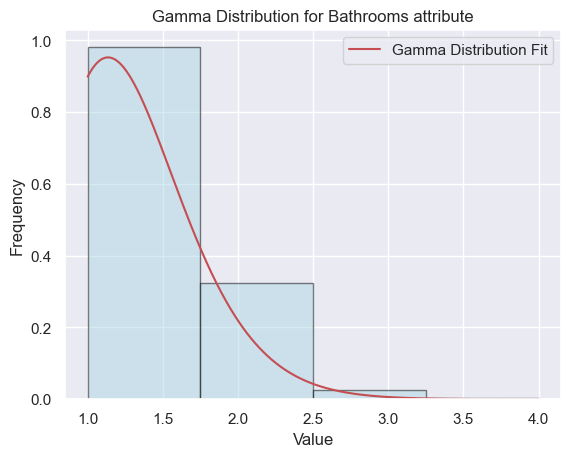

In [21]:
from scipy.stats import gamma

data = df['bathrooms']

# Fit the Gamma distribution to the data
params = gamma.fit(data, floc=0)

# Plotting the histogram
plt.hist(data, bins=4, density=True, alpha=0.5, color='lightblue', edgecolor='black')

# Plotting the fitted Gamma distribution
x = np.linspace(1, 4, 1000)
pdf = gamma.pdf(x, *params)
plt.plot(x, pdf, 'r', label='Gamma Distribution Fit')

# Display the plot
plt.title('Gamma Distribution for Bathrooms attribute')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('bathroom gamma distribution')
plt.show()


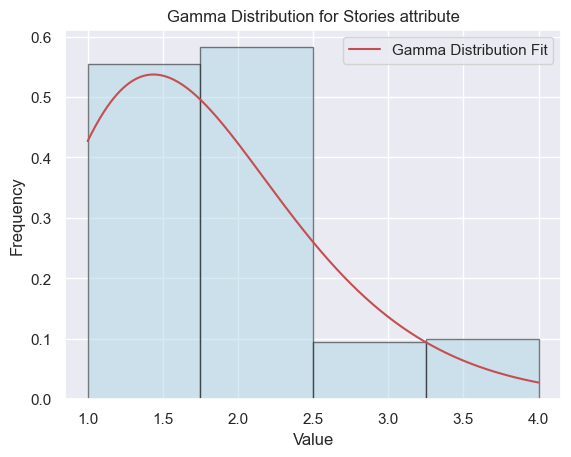

In [22]:

data = df['stories']

# Fit the Gamma distribution to the data
params = gamma.fit(data, floc=0)

# Plotting the histogram
plt.hist(data, bins=4, density=True, alpha=0.5, color='lightblue', edgecolor='black')

# Plotting the fitted Gamma distribution
x = np.linspace(1, 4, 1000)
pdf = gamma.pdf(x, *params)
plt.plot(x, pdf, 'r', label='Gamma Distribution Fit')

# Display the plot
plt.title('Gamma Distribution for Stories attribute')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('stories distribution')
plt.show()

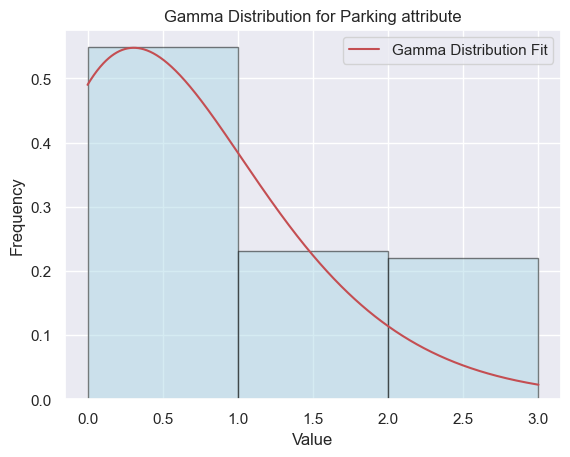

In [23]:
data = df['parking']

# Fit the Gamma distribution to the data
params = gamma.fit(data, floc=-1)

# Plotting the histogram
plt.hist(data, bins=3, density=True, alpha=0.5, color='lightblue', edgecolor='black')

# Plotting the fitted Gamma distribution
x = np.linspace(0, 3, 1000)
pdf = gamma.pdf(x, *params)
plt.plot(x, pdf, 'r', label='Gamma Distribution Fit')

# Display the plot
plt.title('Gamma Distribution for Parking attribute')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('Parking gamma distribution')
plt.show()


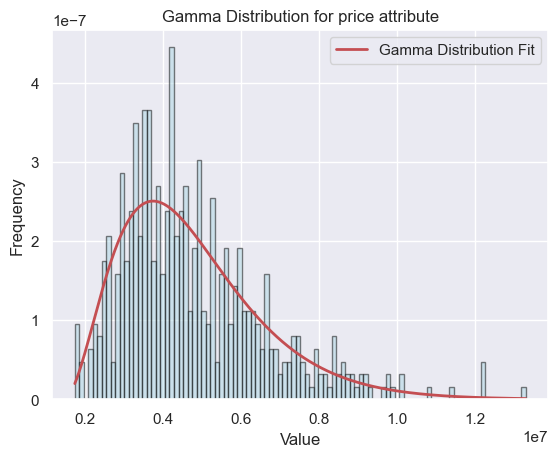

In [24]:
data = df['price']

# Fit the Gamma distribution to the data
params = gamma.fit(data)

# Plotting the histogram
plt.hist(data, bins=100, density=True, alpha=0.5, color='lightblue', edgecolor='black')

# Plotting the fitted Gamma distribution
x = np.linspace(min(data), max(data), 1000) 
pdf = gamma.pdf(x, *params)
plt.plot(x, pdf, 'r-', label='Gamma Distribution Fit', linewidth=2)

# Display the plot
plt.title('Gamma Distribution for price attribute')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('price gamma distribution')
plt.show()


#### Normal Distribution

The **normal distribution**, also known as the Gaussian distribution, is a fundamental concept in statistics and probability theory. It is characterized by a *symmetric bell-shaped curve*, where most observations cluster around the central peak, which is the mean of the distribution. The normal distribution is defined by **two parameters**: *mean* and *standard deviation* (it measures the spread or variability of the observations around the mean). The mean, median, and mode of the normal distribution are all equal. Approximately 68% of the observations fall within $±1$ standard deviation from the mean, approximately 95% fall within $±2$ standard deviations and approximately 99.7% fall within $±3$ standard deviations. The normal distribution is described by its probability density function (PDF), given by the formula:

$$ F(x) = \frac {1}{\sigma \sqrt 2 \pi} e ^ \frac {-(x - \mu)^2}  {2\sigma^2}$$

where $x$ is the random variable, $\mu$ is the mean, $\sigma$ is the standard deviation. The normal distribution is not suitable for modeling skewed distributions. It is specifically designed for symmetric distributions[33]

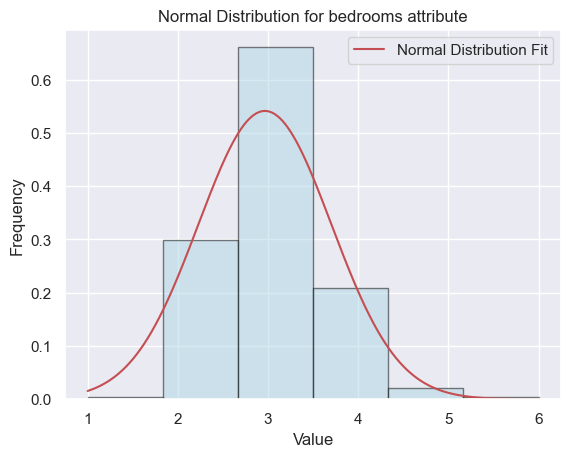

In [25]:
from scipy.stats import norm

data = df['bedrooms']

# Fit the Gamma distribution to the data
mu, std = norm.fit(data)

# Plotting the histogram
plt.hist(data, bins=6, density=True, alpha=0.5, color='lightblue', edgecolor='black')

# Plotting the fitted Gamma distribution
x = np.linspace(1, 6, 1000)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', label='Normal Distribution Fit')

# Display the plot
plt.title('Normal Distribution for bedrooms attribute')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('bedrooms normal distribution')
plt.show()


#### Rayleigh Distribution

A Rayleigh distribution is a continuous probability distribution for positive-valued random variables. It is often used to model the distribution of magnitudes or amplitudes of processes that have a circular component, such as the wind speed or wave heights. The Rayleigh distribution is a special case of the Weibull distribution with a specific shape parameter.

Mathematically, the probability density function (PDF) of a Rayleigh distribution with scale parameter $\sigma$ is given by[34]:

$$ f(x;\sigma) = \frac {x}{\sigma ^2} ^ \frac{- x^2}{2\sigma^2}$$

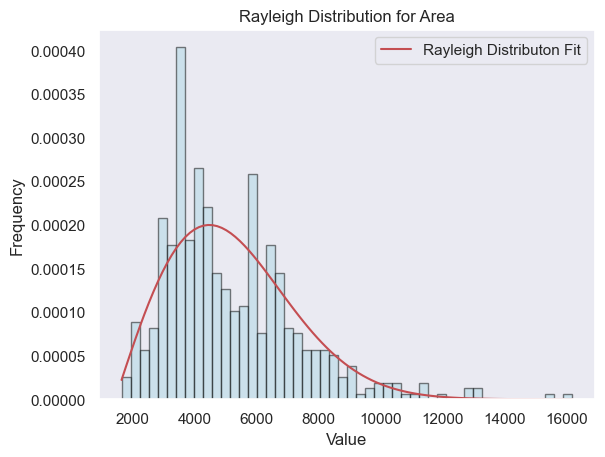

In [26]:
from scipy import stats

data = df['area']

loc, scale = stats.rayleigh.fit(data) 

xl = np.linspace(data.min(), data.max(), 100)

fig, axe = plt.subplots()
axe.hist(data, bins=50, density=1, alpha=0.5, color='lightblue', edgecolor='black')
axe.plot(xl, stats.rayleigh(scale=scale, loc=loc).pdf(xl), 'r', label="Rayleigh Distributon Fit")
axe.set_title("Rayleigh Distribution for Area")
axe.set_xlabel('Value')
axe.set_ylabel("Frequency")
axe.legend()
axe.grid()
plt.savefig('Area Rayleigh distribution')
plt.show()

Let's visualize the numerical variables with the **boxplot**. Visualizing the numerical variables with a boxplot is a powerful technique that utilizes *boxes* and *lines* to depict the distribution of one or more groups of numeric data. The box limits represent the range of the central 50% of the data, with a central line indicating the median value. Lines extend from each box to capture the range of the remaining data, and dots are placed beyond the line edges to highlight outliers. Box plots offer a high-level summary of a group of data's symmetry, skewness, variance, and the presence of outliers. They provide a quick understanding of where the main bulk of the data lies. The construction of a box plot is based on quartiles, dividing the dataset into equal fourths. The first quartile (Q1) and the third quartile (Q3) define the interquartile range (IQR), and the second quartile (Q2) represents the median. In a symmetric distribution, the median is at the exact center of the box, with equal distances between Q1 and Q2 and between Q2 and Q3. Outliers are evenly distributed on either side of the box. In a skewed distribution, the median is off-center, and whisker lengths may be imbalanced, indicating the presence of outliers on one side of the distribution[35].

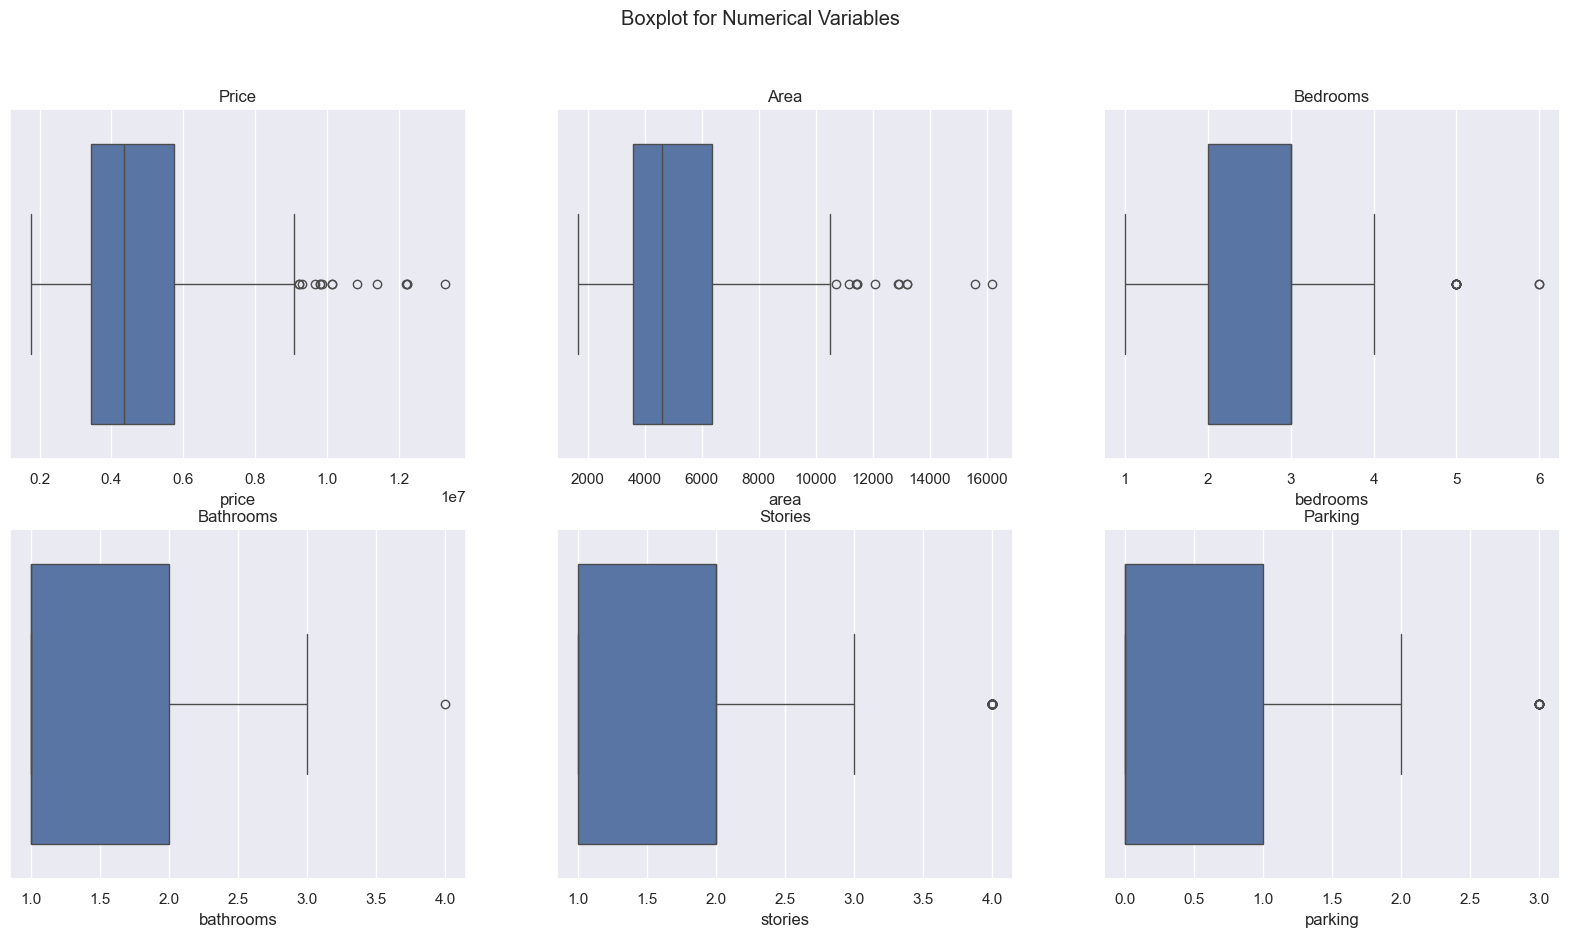

In [27]:
f, axes = plt.subplots(2, 3, figsize=(20, 10))

sns.boxplot(df['price'], ax=axes[0,0], orient= 'h').set_title('Price');
sns.boxplot(df['area'], ax=axes[0,1],orient= 'h').set_title('Area');
sns.boxplot(df['bedrooms'], ax=axes[0,2],orient= 'h').set_title('Bedrooms');
sns.boxplot(df['bathrooms'], ax=axes[1,0],orient= 'h').set_title('Bathrooms');
sns.boxplot(df['stories'], ax=axes[1,1],orient= 'h').set_title('Stories');
sns.boxplot(df['parking'], ax=axes[1,2],orient= 'h').set_title('Parking');

plt.suptitle('Boxplot for Numerical Variables')
plt.savefig('Boxplot for Numerical Variables')
plt.show()


#### Bivariate Analysis


With the completion of univariate analysis, where each variable is individually examined to understand its characteristics and distribution within the dataset, the analysis progresses to the next step known as Bivariate Analysis. This analytical phase aims to explore the relationship between each variable in the dataset and the target variable of interest, the price in the present analysis. Bivariate analysis encompasses three primary types:

1. **Bivariate Analysis of Two Numerical Variables**: Examining the relationship between two numerical variables to understand correlations, associations, or patterns between them.
2. **Bivariate Analysis of One Categorical Variable and One Numerical Variable**.
3. **Bivariate Analysis of Two Categorical and Categorical**: Investigating the relationship between two categorical variables to identify dependencies or connections.

The current analysis will predominantly focus on the first two types, delving into relationships between numerical variables and between categorical variables to glean insights into their interrelationships[36].

**Data on two numeric variables** is commonly visualized using a *scatterplot*. In a scatterplot, individual data points are represented as dots, providing a visual depiction of the relationship between the two variables. These plots offer a straightforward way to assess whether there is a connection between the two variables. The resulting pattern in a scatterplot can indicate the nature of the relationship, whether it is linear or non-linear, and provide insights into the strength of the relationship. By examining the arrangement of points on the plot, one can observe trends, correlations, or potential patterns in the data, facilitating a qualitative assessment of how the variables interact with each other[37].

In the present dataset, the **price variable** has been taken into analysis against *all the other numerical variable* to check if there is any correlation that could bring to a raise of prices when we are looking to buy a particular property. Analyzing the price variable against other numerical variables in the dataset aims to explore potential correlations that might influence property prices. This investigation seeks to identify any relationships or patterns that could contribute to an increase in property prices when considering specific property attributes. By examining the correlation between price and various numerical variables such as area, number of bedrooms, bathrooms, or other relevant features, the goal is to discern if there exists any association between these attributes and property prices. Discovering correlations can aid in understanding which factors might contribute more significantly to higher property prices. For instance, it could reveal whether larger property sizes, more bedrooms, certain amenities, or other characteristics tend to be associated with increased property values.


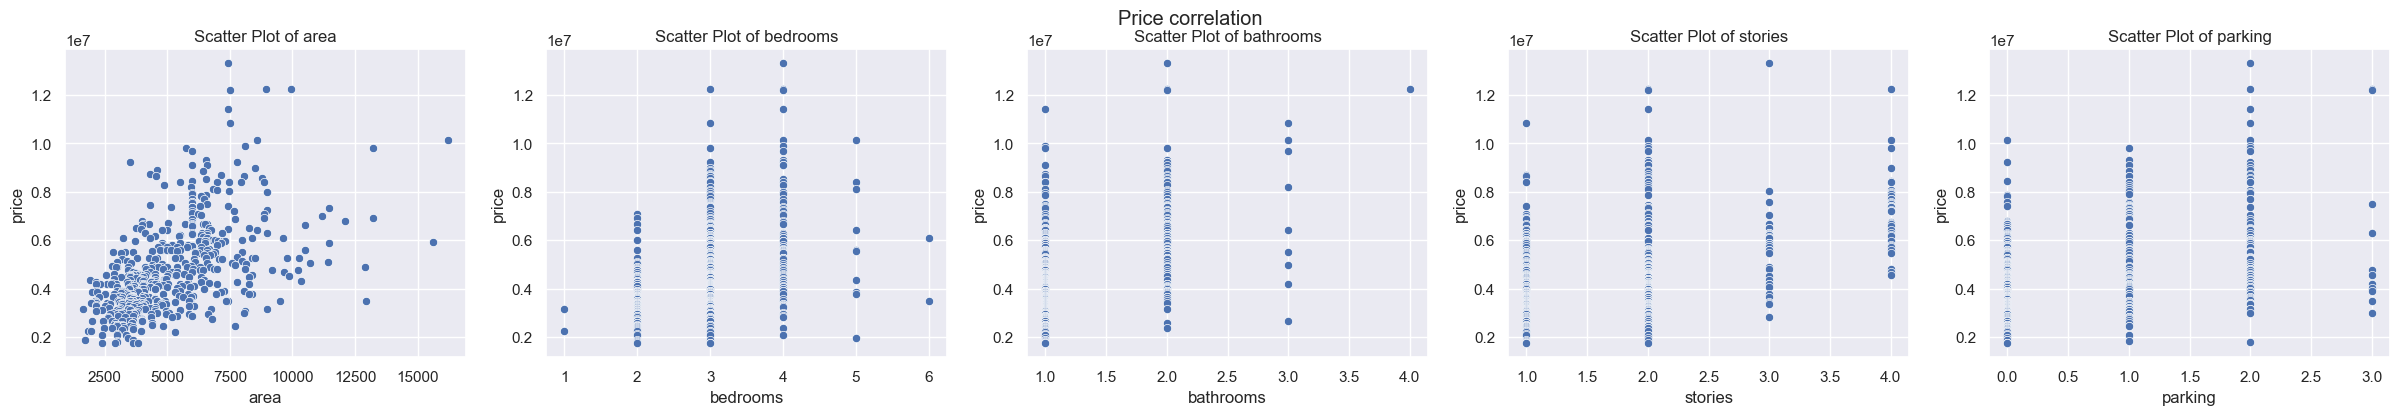

In [28]:
num_variables = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

fig, axes = plt.subplots(1, len(num_variables), figsize=(30, 4))
axes = axes.flatten()

for i, col in enumerate(num_variables):
    sns.scatterplot(data=df, x=col, y='price', ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('price')


plt.suptitle('Price correlation')
plt.savefig('Scatterplot of Numerical Variable')
plt.show()


Before look into the analysis of the output, the `sns.regplot()` function is utilized to create a scatterplot of two variables, 'x' and 'y', and fit a linear regression model (y ~ x). This function not only draws the scatterplot but also overlays the resulting regression line and a 95% confidence interval for that regression. The regression line serves as a visual representation of the relationship between the two variables, and the confidence interval provides an indication of the uncertainty associated with the regression estimate. This graphical representation can offer additional insights into the strength and direction of the relationship, allowing for a more nuanced understanding of the correlation between the variables[38].

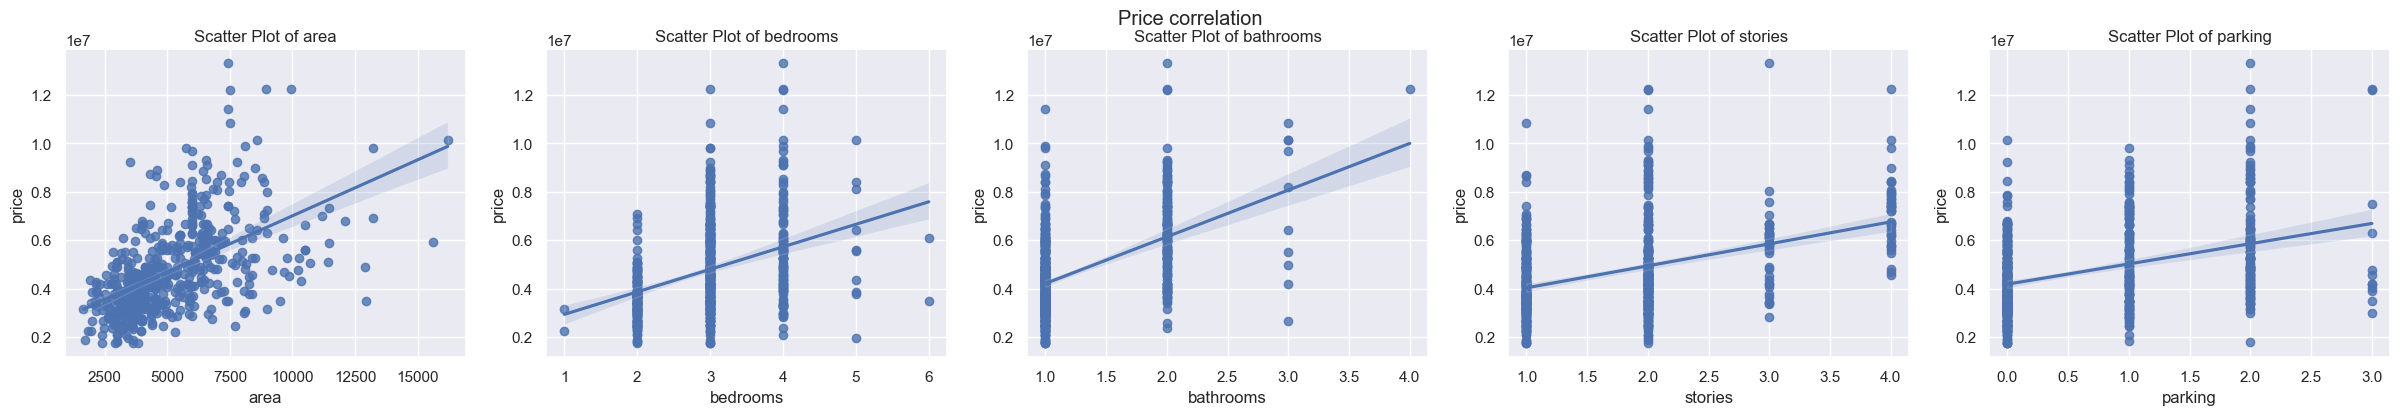

In [29]:
num_variables = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

fig, axes = plt.subplots(1, len(num_variables), figsize=(30, 4))
axes = axes.flatten()

for i, col in enumerate(num_variables):
    sns.regplot(data=df, x=col, y='price', ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('price')


plt.suptitle('Price correlation')
plt.savefig('Scatterplot with regression of Numerical Variable')
plt.show()

The **scatterplots** indicate a *positive correlation* between the price of a home and its area, suggesting that, on average, *larger homes tend to be more expensive**. However, the data also exhibits variability, indicating that homes with similar areas can have different prices. This variability is attributed to the influence of other factors, notably the location of the homes. Properties in more desirable areas often command higher prices. The analysis emphasizes that area is not the sole determinant of a home's price. Other factors such as the condition of the home, the number of bathrooms, stories, and additional features also play a role. Generally, homes with more favorable attributes tend to have higher prices. Nevertheless, there is variability within each parameter, implying that homes with the same number of bedrooms or bathrooms may still exhibit differences in prices, reflecting the impact of diverse factors on property values.

To understand the correlation between two variables, one commonly used metric is the Pearson correlation coefficient. This coefficient measures the linear association between two variables and ranges from -1 to 1. A value of -1 indicates a perfect negative linear correlation, 1 indicates a perfect positive linear correlation, and 0 indicates no linear correlation. In Python, the correlation between two variables can be calculated using the **`.corr()`** function. This function is applied to a pair of variables, and it returns the correlation coefficient. The resulting value helps quantify the strength and direction of the linear relationship between the variables. A coefficient closer to -1 or 1 suggests a stronger correlation, while a value closer to 0 indicates a weaker or no linear correlation[39].

In [30]:
# correlation
df.corr(numeric_only=True)

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


The analysis reveals several correlations between the variables. Notably, there exists a moderately strong positive correlation (0.53) between "price" and "area." This suggests that homes with larger areas tend to command higher prices. Additionally, a positive correlation is observed between "price" and both "bathrooms" (0.52) and "stories" (0.42), indicating that houses with more bathrooms or stories tend to have higher prices. However, the correlations of "price" with "bedrooms" (0.37) and "area" with "bedrooms" (0.15) are relatively weaker. This implies a less pronounced relationship between the number of bedrooms and property prices or the area of the property. Interestingly, the variable "parking" demonstrates a relatively low correlation with other variables. This suggests that the availability of parking spaces does not exhibit a strong correlation with house prices, property area, or other characteristics within this dataset.

Continuing the exploration of variables, scatter plots will be generated to examine the relationship between "price" and "area" while considering the influence of other numerical variables (such as the number of bedrooms, bathrooms, stories, and parking) and categorical variables (such as mainroad, guestrooms, basement etc.). This analysis aims to provide a more comprehensive understanding of how these factors collectively contribute to the variation in property prices.

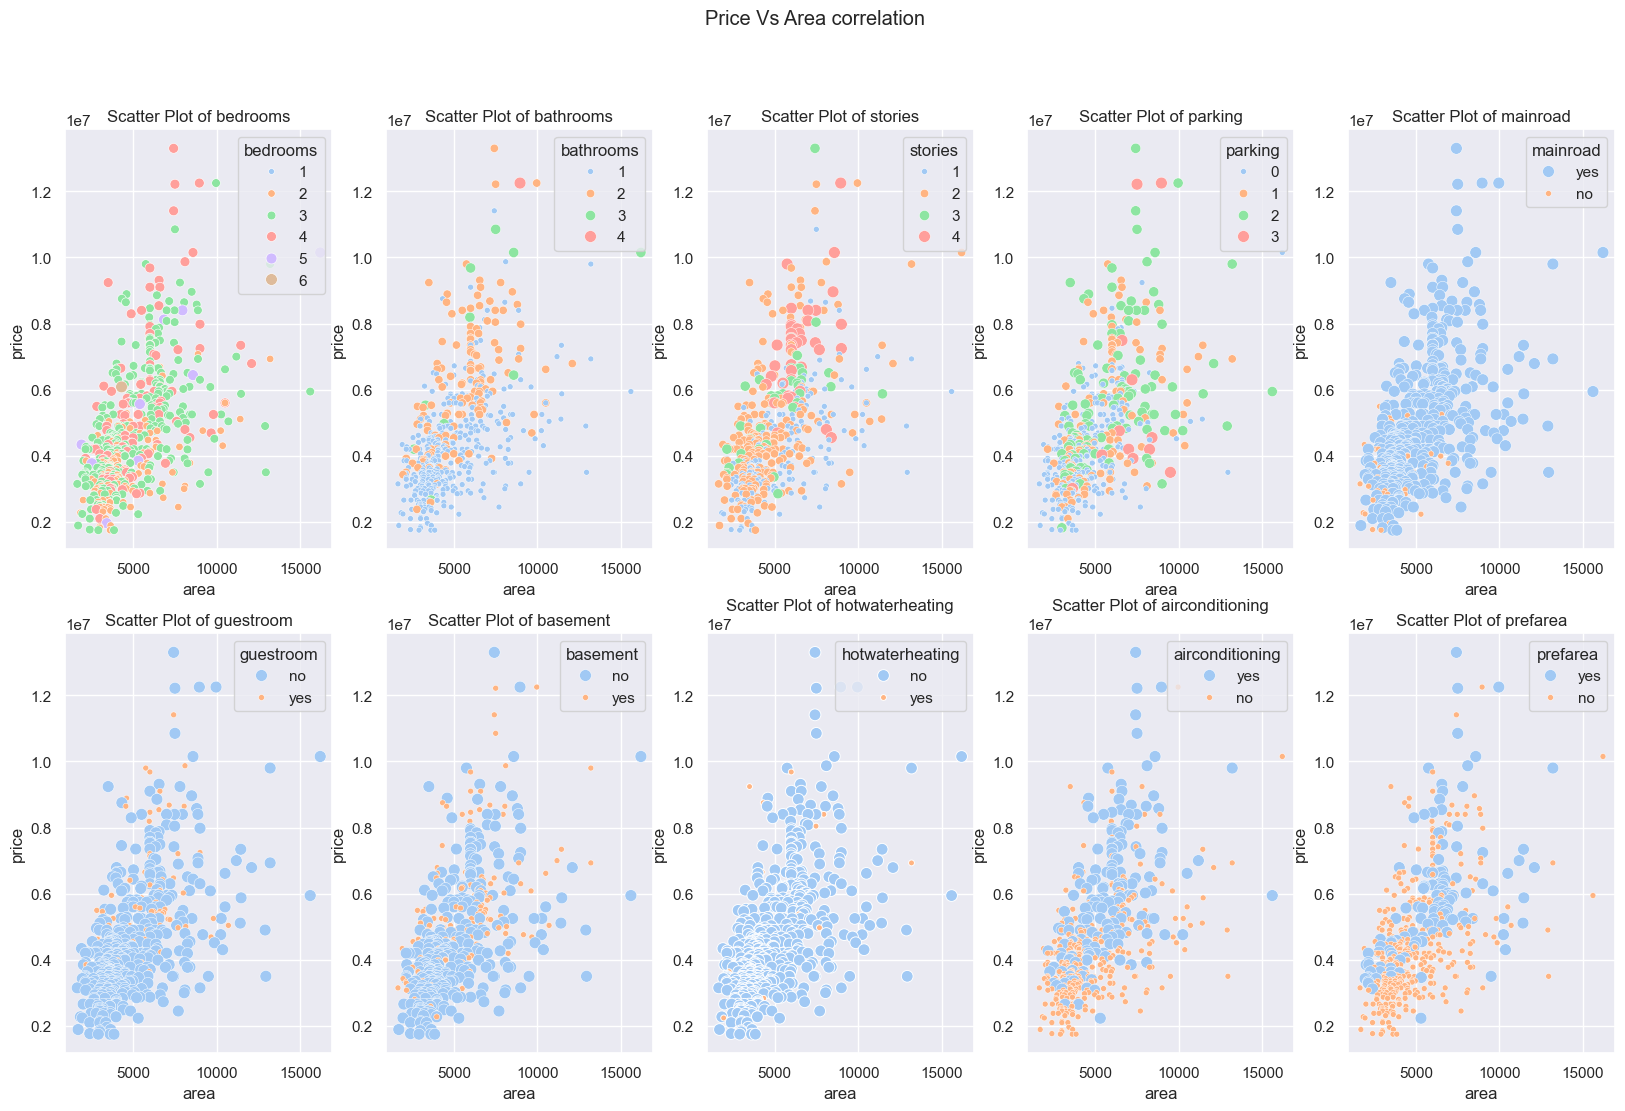

In [31]:
num_variables = ['bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

fig, axes = plt.subplots(2, 5, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(num_variables):
    sns.scatterplot(data=df, x= 'area', y='price', hue= col, ax=axes[i], palette='pastel', size = col)
    axes[i].set_title(f'Scatter Plot of {col}')
    axes[i].set_xlabel('area')
    axes[i].set_ylabel('price')  

plt.suptitle('Price Vs Area correlation')
plt.savefig('Correlation Plot of Price & Area')
plt.show()

The scatter plots, incorporating the size of the points to represent the number of bedrooms and color variation, reveal a discernible pattern. It suggests that as the number of bedrooms increases, the price tends to vary across different ranges of area. This observation indicates a potential increasing trend in prices associated with larger areas for houses with a higher number of bedrooms or bathrooms. The number of bathrooms in a home does not appear to have a strong correlation with its price.  There is a slight positive correlation, but it is not very significant. There are several homes with the same number of bathrooms that have different prices. At the same time, it seems that the price of a house is influenced by the location of the house. Houses that face the main road and are located in a preferred area tend to have higher prices. Other variables show some variability, indicating that homes with a similar number of guestrooms or basements can have different prices depending on the size of the area where the house is situated.

Heatmaps are a valuable tool for identifying collinearity within data, aiding in the determination of which rows or columns should be included or excluded in analytical results. When creating predictor models, heatmaps help filter out dependent variables that exhibit collinearity. The heatmap is a matrix representation of variables, with colors indicating the intensity of the correlation value. By visualizing the correlation among features, heatmaps serve as an effective tool for understanding relationships within a machine learning model, especially when assessing the correlation among different features or variables[40].

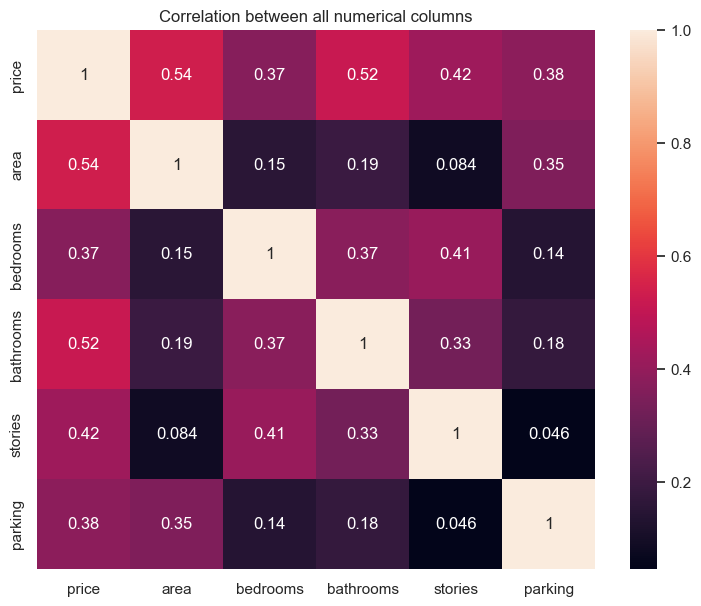

In [32]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Correlation between all numerical columns')
plt.savefig('heatmap of Numerical Variable')
plt.show()

The numeric variable "Area" exhibits the strongest correlation with the target variable "Price" among all the numeric variables, with a correlation coefficient of 0.54. This suggests a moderately strong positive linear relationship between the area of a house and its corresponding price. In other words, as the area of a house increases, there is a tendency for its price to also increase.

#### Relationships Between Numerical and Categorical Variables

Exploring the relationship between the target variable 'price' and different categorical variables is essential for understanding how these attributes influence property prices. The boxplot is one of different plot that can be used for this purpose. The following box plot will examinate[41]: 

- how the presence or absence of a main road influences property prices.
- the impact of having a guestroom on property prices.
- whether the presence of a basement affects property prices.
- the relationship between having hot water heating / air conditioning and property prices.
- Understand if properties in preferred areas command different prices.

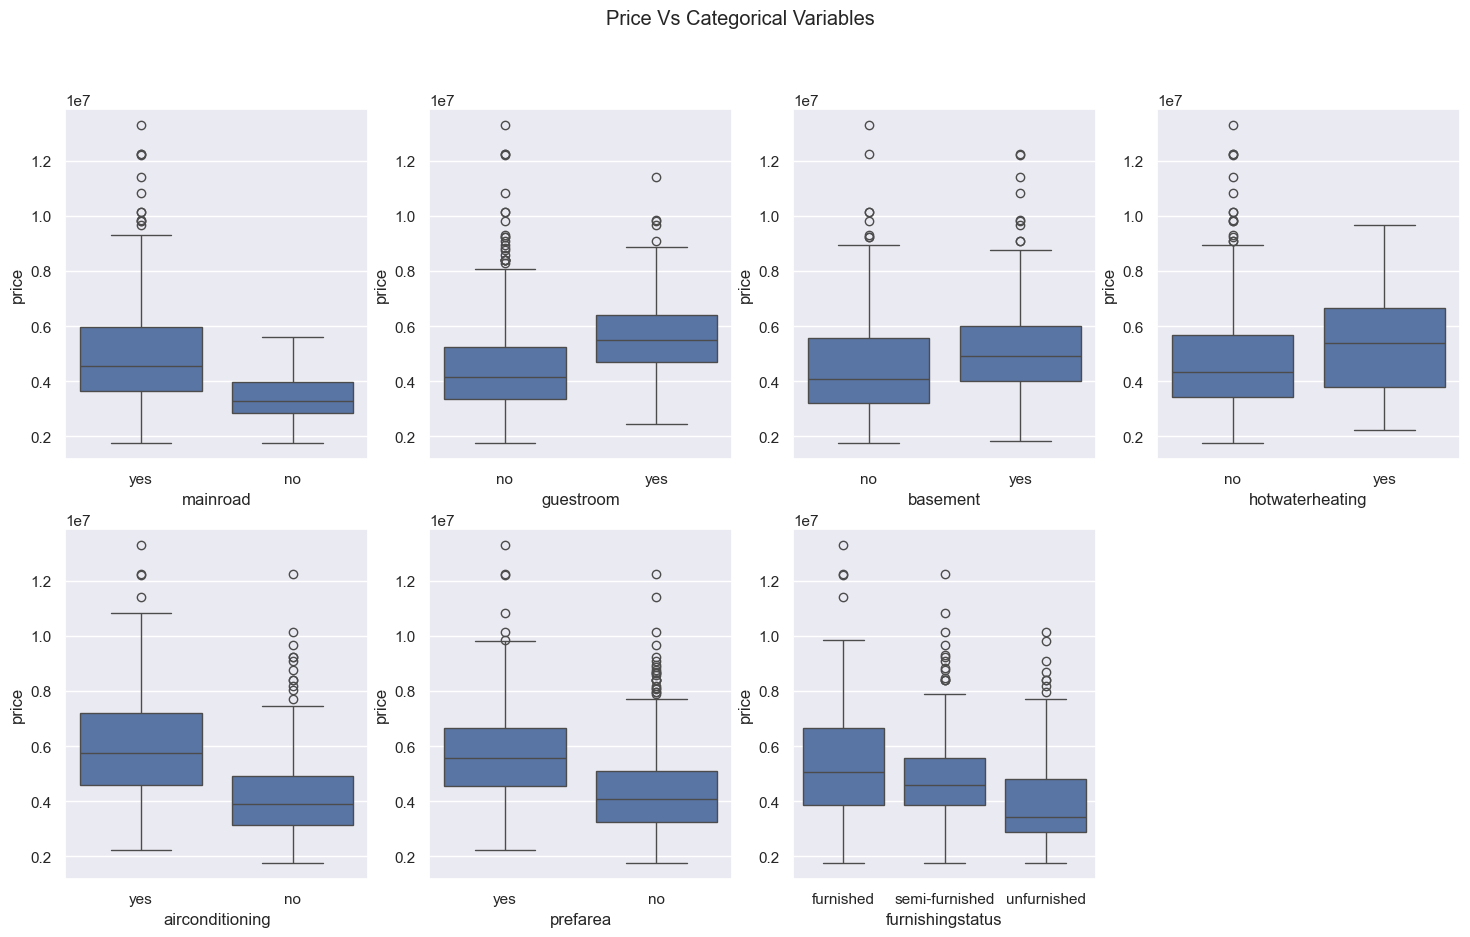

In [33]:
cat_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

fig, ax = plt.subplots(2, 4, figsize=(18, 10))
ax = ax.flatten()

fig.delaxes(ax[-1])


for i, var in enumerate(cat_columns):
    sns.boxplot(x=var, y=df['price'], data=df, ax=ax[i])

plt.suptitle('Price Vs Categorical Variables')
plt.savefig("Price Vs Categorical Variables")
plt.show()


The visualizations reveal that houses with specific attributes, such as proximity to a main road, guestrooms, basements, hot water heating systems, air conditioning, parking areas, and those located in preferred areas, exhibit higher average prices. Moreover, the data suggests that furnished houses tend to command higher average prices compared to their semi-furnished and unfurnished counterparts.

#### Simulate the data set

Creating a simulated dataset based on real-world data involves replicating statistical properties and distributions found in the original dataset. By generating synthetic data that mirrors the statistical characteristics of the original dataset, it's possible to create a representative sample for further analysis or testing purposes. This process often involves employing statistical methods to model and generate data that mimics the patterns observed in the original dataset.

The first step is the creation of a new dataset that can be performed using the pandas method `pd.DataFrame()`. Within this method, the `columns` parameter is utilized to define the attribute names for our new dataset. This action establishes an empty DataFrame with the specified column names, serving as the framework for the subsequent dataset. Following the DataFrame's creation, it becomes possible to populate it with simulated or generated data, intending to emulate the statistical characteristics observed in the original dataset[42].

In [34]:
new_df_attributes = ['new_price', 'new_area', 'new_bedrooms', 'new_bathrooms', 'new_stories', 'new_mainroad',
       'new_guestroom', 'new_basement', 'new_hotwaterheating', 'new_airconditioning',
       'new_parking', 'new_prefarea', 'new_furnishingstatus']
# create a new dataset
new_df = pd.DataFrame(columns= new_df_attributes)

# display the new dataset
new_df

,new_price,new_area,new_bedrooms,new_bathrooms,new_stories,new_mainroad,new_guestroom,new_basement,new_hotwaterheating,new_airconditioning,new_parking,new_prefarea,new_furnishingstatus


Now, let's move on to populating the new DataFrame, starting with the categorical variables. The `np.random` module comes in handy for generating random numbers. Specifically, the `np.random.choice` method is employed for categorical variables. This method enables the selection of random values from a given array, which, in this context, represents the categories of the respective variable. Utilizing this approach ensures that the simulated categorical data aligns with the distribution of the original dataset, preserving its statistical properties[43].

In [35]:
# using random.choice to simulate categorical variables
new_df['new_furnishingstatus'] = np.random.choice(a=['unfurnished', 'furnished', 'semi-furnished'],size=545,p=[0.33, 0.25,0.42])
new_df['new_mainroad'] = np.random.choice(a=['no', 'yes'], size=545, p=[0.14, 0.86])
new_df['new_guestroom'] = np.random.choice(a=['no', 'yes'], size=545, p=[0.82, 0.18])
new_df['new_basement'] = np.random.choice(a=['no', 'yes'], size=545, p=[0.65, 0.35])
new_df['new_hotwaterheating'] = np.random.choice(a=['no', 'yes'], size=545, p=[0.95, 0.05])
new_df['new_airconditioning'] = np.random.choice(a=['no', 'yes'], size=545, p=[0.69, 0.31])
new_df['new_prefarea'] = np.random.choice(a=['no', 'yes'], size=545, p=[0.77, 0.23])

The code generates a new column in the new dataset. The values are randomly chosen from different options, such as ('no' and 'yes') or ('unfurnished', 'furnished', 'semi-furnished'), based on a specified probability distribution. The probabilities for each categorical variables are calculated by dividing the occurrences of each unique value by the total number of rows in the original dataset, which is 544 in this case. This step ensures that the simulated data maintains a similar distribution to the original dataset, reflecting the relative frequencies of each category.

Moving forward, to simulate random numbers for numerical variables based on their probability distributions (normal, gamma or Rayleigh), the NumPy functions [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html), [`np.random.gamma`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html) and `np.random.rayleigh` are utilized. These functions generate random numbers that follow the specified probability distribution. By employing these functions with appropriate parameters derived from the original dataset, we can create simulated numerical data that approximates the characteristics of the real dataset.

Generate a random sample and create visualization for variables following a Gamma distribution.

In [36]:
import scipy.special as sps

# Original values
mean_bath, std_bath = df['bathrooms'].mean(), df['bathrooms'].std()

# Estimate shape and scale parameters for gamma distribution
shape_bath = (mean_bath / std_bath) ** 2
scale_bath = (std_bath ** 2) / mean_bath

# Generate random data for 'new_price' using gamma distribution
new_df['new_bathrooms'] = np.random.gamma(shape_bath, scale_bath, size=545)

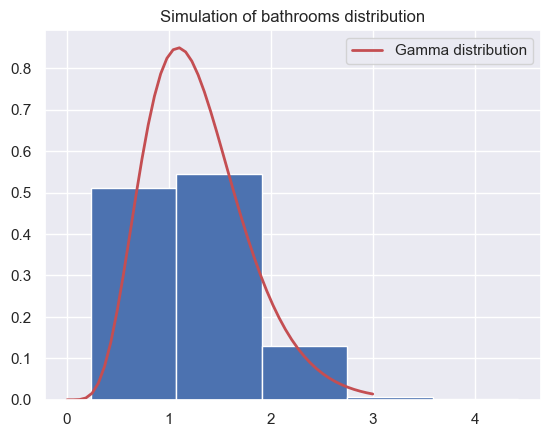

In [37]:
bin = np.linspace(0,3)
count, bins, ignored = plt.hist(new_df['new_bathrooms'], 5, density=True)
y = bin**(shape_bath-1)*(np.exp(-bin/scale_bath) /  
                     (sps.gamma(shape_bath)*scale_bath**shape_bath))
plt.plot(bin, y, linewidth=2, color='r', label='Gamma distribution')

plt.title('Simulation of bathrooms distribution')
plt.legend()
plt.savefig('Simualted bathrooms distribution')
plt.show()

In [38]:
# Original values
mean_stor, std_stor = df['stories'].mean(), df['stories'].std()

# Estimate shape and scale parameters for gamma distribution
shape_stor = (mean_stor / std_stor) ** 2
scale_stor = (std_stor ** 2) / mean_stor

# Generate random data for 'new_price' using gamma distribution
new_df['new_stories'] = np.random.gamma(shape_stor, scale_stor, size=545)


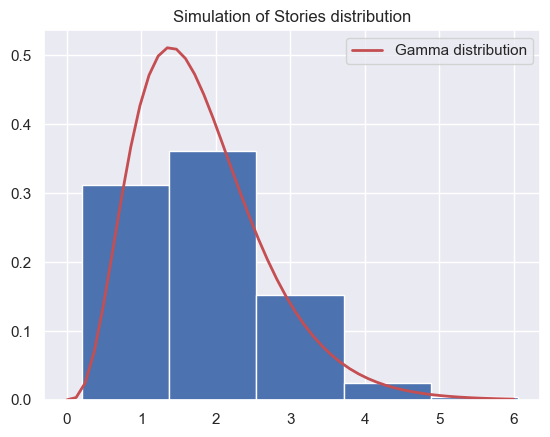

In [39]:
bin = np.linspace(0,6)
count, bins, ignored = plt.hist(new_df['new_stories'], 5, density=True)
y = bin**(shape_stor-1)*(np.exp(-bin/scale_stor) /  
                     (sps.gamma(shape_stor)*scale_stor**shape_stor))
plt.plot(bin, y, linewidth=2, color='r',label='Gamma distribution') 

plt.title('Simulation of Stories distribution')
plt.legend()
plt.savefig('Simualted stories distribution')
plt.show()

In [40]:
# Original values
mean_park, std_park = df['parking'].mean(), df['parking'].std()

# Estimate shape and scale parameters for gamma distribution
shape_park = (mean_park / std_park) ** 2
scale_park = (std_park ** 2) / mean_park

# Generate random data for 'new_price' using gamma distribution
new_df['new_parking'] = np.random.gamma(shape_park, scale_park, size=545)


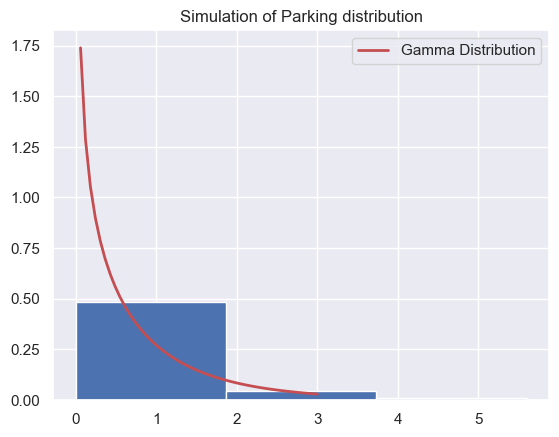

In [41]:
bin = np.linspace(0,3)
count, bins, ignored = plt.hist(new_df['new_parking'], 3, density=True)
y = bin**(shape_park-1)*(np.exp(-bin/scale_park) /  
                     (sps.gamma(shape_park)*scale_park**shape_park))
plt.plot(bin, y, linewidth=2, color='r', label= 'Gamma Distribution')
plt.title('Simulation of Parking distribution')
plt.legend()
plt.savefig('Simualted parking distribution')
plt.show()

In [42]:
# Original values
mean_price, std_price = df['price'].mean(), df['price'].std()

# Estimate shape and scale parameters for gamma distribution
shape_price = (mean_price / std_price) ** 2
scale_price = (std_price ** 2) / mean_price

# Generate random data for 'new_price' using gamma distribution
new_df['new_price'] = np.random.gamma(shape_price, scale_price, 545)

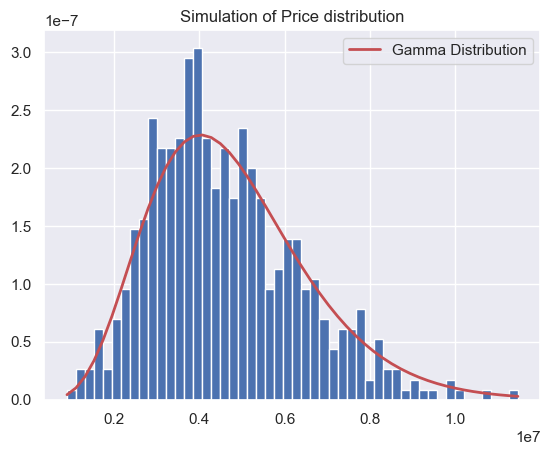

In [43]:
count, bins, ignored = plt.hist(new_df['new_price'], 50, density=True)
y = bins**(shape_price-1)*(np.exp(-bins/scale_price) /  
                     (sps.gamma(shape_price)*scale_price**shape_price))
plt.plot(bins, y, linewidth=2, color='r', label='Gamma Distribution')
plt.title('Simulation of Price distribution')
plt.legend()
plt.savefig('Simualted price distribution')
plt.show()

Generate a random sample and create visualizations for variables following a Rayleigh distribution.

In [44]:
import scipy.stats as stats

area_data = df['area']

# Calculate the scale parameter for Rayleigh distribution
scale_parameter = np.sqrt(2 / np.pi) * area_data.std()

# Generate random samples for 'area' following the Rayleigh distribution
new_df['new_area'] = np.random.rayleigh(scale_parameter, 545)

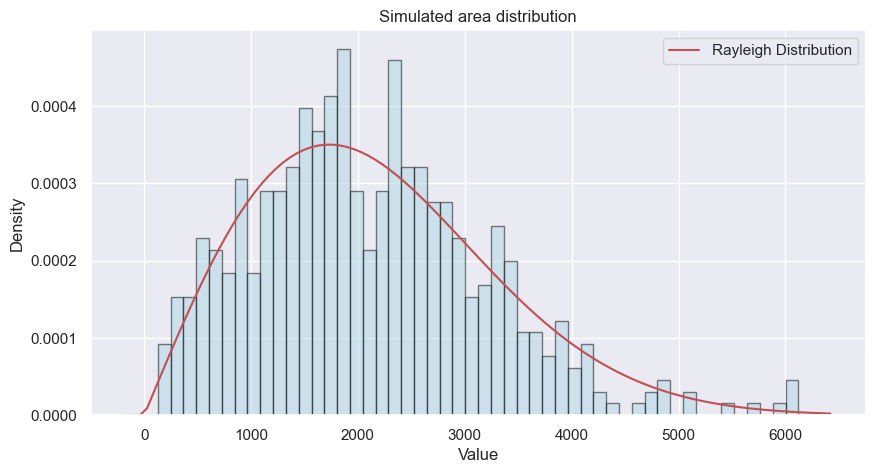

In [45]:
plt.figure(figsize=(10, 5))

plt.hist(new_df['new_area'], bins=50, density=True, alpha=0.5, color='lightblue', edgecolor='black')

# Probability distribution plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
plt.plot(x, stats.rayleigh.pdf(x, scale=scale_parameter), 'r-', label='Rayleigh Distribution')

plt.title('Simulated area distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.savefig('simulated area distribution')
plt.show()


Generate a random sample and create visualizations for variables following a Normal distribution.

In [46]:
# simulate the normal distribution
mu, sigma = df['bedrooms'].mean(), df['bedrooms'].std()
new_df['new_bedrooms'] = np.random.normal(mu, sigma, size=545)

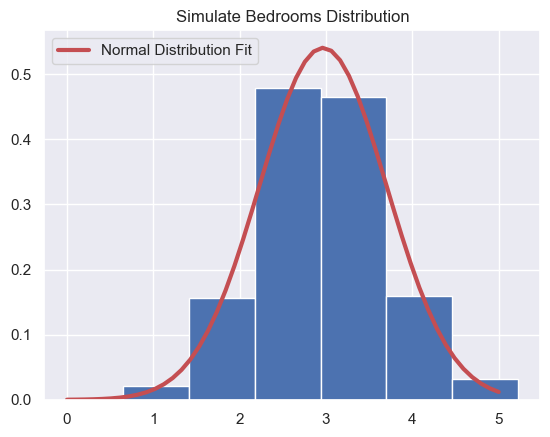

In [47]:
# visualize the simulate variable
bin = np.linspace(0, 5, 50)
count, bins, ignored = plt.hist(new_df['new_bedrooms'], 6, density=True)
plt.plot(bin, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bin - mu)**2 / (2 * sigma**2) ),
         linewidth=3, color='r', label='Normal Distribution Fit')
plt.title('Simulate Bedrooms Distribution')
plt.legend()
plt.savefig('Simualted bedroom distribution')
plt.show()

#### Original Vs Simulated Dataset

Now, let's take a closer look at the new dataset and compare its characteristics with the original dataset.

In [48]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   new_price             545 non-null    float64
 1   new_area              545 non-null    float64
 2   new_bedrooms          545 non-null    float64
 3   new_bathrooms         545 non-null    float64
 4   new_stories           545 non-null    float64
 5   new_mainroad          545 non-null    object 
 6   new_guestroom         545 non-null    object 
 7   new_basement          545 non-null    object 
 8   new_hotwaterheating   545 non-null    object 
 9   new_airconditioning   545 non-null    object 
 10  new_parking           545 non-null    float64
 11  new_prefarea          545 non-null    object 
 12  new_furnishingstatus  545 non-null    object 
dtypes: float64(6), object(7)
memory usage: 55.5+ KB


The comparison between the original and simulated datasets reveals alignment in their structure and absence of missing values, ensuring consistency and reliability. However, the discrepancy in data types, particularly the difference between **int64** and **float64** for numerical variables, stands out as a potential challenge. Ensuring data type consistency between the original and simulated datasets is important for maintaining the integrity of analyses and interpretations. To solve the issue the pandas function astype() is used. This function allows the conversion of the data type of a pandas Series to a specified type. In the context of the simulated dataset, the `astype()` function can be applied to convert the data type of numerical variables from float64 to int64, aligning them with the data types in the original dataset[44]. 



In [49]:
values = ['new_price', 'new_area', 'new_bedrooms', 'new_bathrooms', 'new_stories', 'new_parking']

for val in values:
    new_df[val] = new_df[val].astype('int64')

Now that simulated arrays have been generated for both categorical and numerical variables, let's assess their values and compare them to the original dataset. While a visualization has already been created for the categorical variables, we'll now focus on presenting the percentage of occurrences for both the original and simulated datasets. This comparison will provide insights into how closely the simulated data aligns with the distribution of the actual dataset.

In [50]:
original_df = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
simulated_df = ['new_mainroad', 'new_guestroom', 'new_basement', 'new_hotwaterheating', 'new_airconditioning', 'new_prefarea', 'new_furnishingstatus']

for original_col, simulated_col in zip(original_df, simulated_df):
    print(f"\nOriginal DataFrame - {original_col}")
    print(df[original_col].value_counts(sort=True, normalize=True).apply(lambda x: f'{x:.1%}'))

    print(f"\nSimulated DataFrame - {simulated_col}")
    print(new_df[simulated_col].value_counts(sort=True, normalize=True).apply(lambda x: f'{x:.1%}'))

    


Original DataFrame - mainroad
mainroad
yes    85.9%
no     14.1%
Name: proportion, dtype: object

Simulated DataFrame - new_mainroad
new_mainroad
yes    86.1%
no     13.9%
Name: proportion, dtype: object

Original DataFrame - guestroom
guestroom
no     82.2%
yes    17.8%
Name: proportion, dtype: object

Simulated DataFrame - new_guestroom
new_guestroom
no     84.0%
yes    16.0%
Name: proportion, dtype: object

Original DataFrame - basement
basement
no     65.0%
yes    35.0%
Name: proportion, dtype: object

Simulated DataFrame - new_basement
new_basement
no     65.7%
yes    34.3%
Name: proportion, dtype: object

Original DataFrame - hotwaterheating
hotwaterheating
no     95.4%
yes     4.6%
Name: proportion, dtype: object

Simulated DataFrame - new_hotwaterheating
new_hotwaterheating
no     95.4%
yes     4.6%
Name: proportion, dtype: object

Original DataFrame - airconditioning
airconditioning
no     68.4%
yes    31.6%
Name: proportion, dtype: object

Simulated DataFrame - new_aircondit

Next, let's proceed to compare the statistical information between the original and simulated datasets for the numerical variables. This analysis will help us understand how well the simulated numerical data replicates the statistical properties of the real-world dataset.

In [51]:
# original dataset
round(df.describe(),2)

,price,area,bedrooms,bathrooms,stories,parking
count,545.00,545.00,545.00,545.00,545.00,545.00
mean,4766729.25,5150.54,2.97,1.29,1.81,0.69
std,1870439.62,2170.14,0.74,0.50,0.87,0.86
min,1750000.00,1650.00,1.00,1.00,1.00,0.00
25%,3430000.00,3600.00,2.00,1.00,1.00,0.00
50%,4340000.00,4600.00,3.00,1.00,2.00,0.00
75%,5740000.00,6360.00,3.00,2.00,2.00,1.00
max,13300000.00,16200.00,6.00,4.00,4.00,3.00


In [52]:
# simulate dataset
round(new_df.describe(),2)

,new_price,new_area,new_bedrooms,new_bathrooms,new_stories,new_parking
count,545.00,545.00,545.00,545.00,545.00,545.00
mean,4592297.29,2102.02,2.46,0.74,1.34,0.35
std,1740247.75,1091.56,0.81,0.63,0.97,0.80
min,896813.00,127.00,0.00,0.00,0.00,0.00
25%,3349754.00,1318.00,2.00,0.00,1.00,0.00
50%,4300303.00,1986.00,2.00,1.00,1.00,0.00
75%,5619313.00,2781.00,3.00,1.00,2.00,0.00
max,11469247.00,6121.00,5.00,4.00,6.00,5.00


Given the nature of random value generation, we observe that the simulated dataset exhibits a comparable level of statistical distribution to the original dataset. However, it's important to note that the specific values for the minimum and maximum differ due to the inherent randomness in the generation process. The primary focus here is on capturing the overall distribution patterns rather than matching specific extreme values.

Before proceeding with the visualization of the correlation in the new dataset, let's generate the correlation matrix for both the original and simulated datasets. This will provide a comprehensive overview of the relationships between variables in each dataset, allowing us to compare their correlation structures. 

In [53]:
# original dataset
df.corr(numeric_only=True)

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [54]:
# simulate dataset
new_df.corr(numeric_only=True)

,new_price,new_area,new_bedrooms,new_bathrooms,new_stories,new_parking
new_price,1.000000,0.001240,0.009869,-0.007748,-0.020854,0.061602
new_area,0.001240,1.000000,-0.000188,-0.026393,-0.040197,-0.001562
new_bedrooms,0.009869,-0.000188,1.000000,-0.024307,0.035288,-0.015199
new_bathrooms,-0.007748,-0.026393,-0.024307,1.000000,-0.024209,0.024653
new_stories,-0.020854,-0.040197,0.035288,-0.024209,1.000000,-0.097305
new_parking,0.061602,-0.001562,-0.015199,0.024653,-0.097305,1.000000


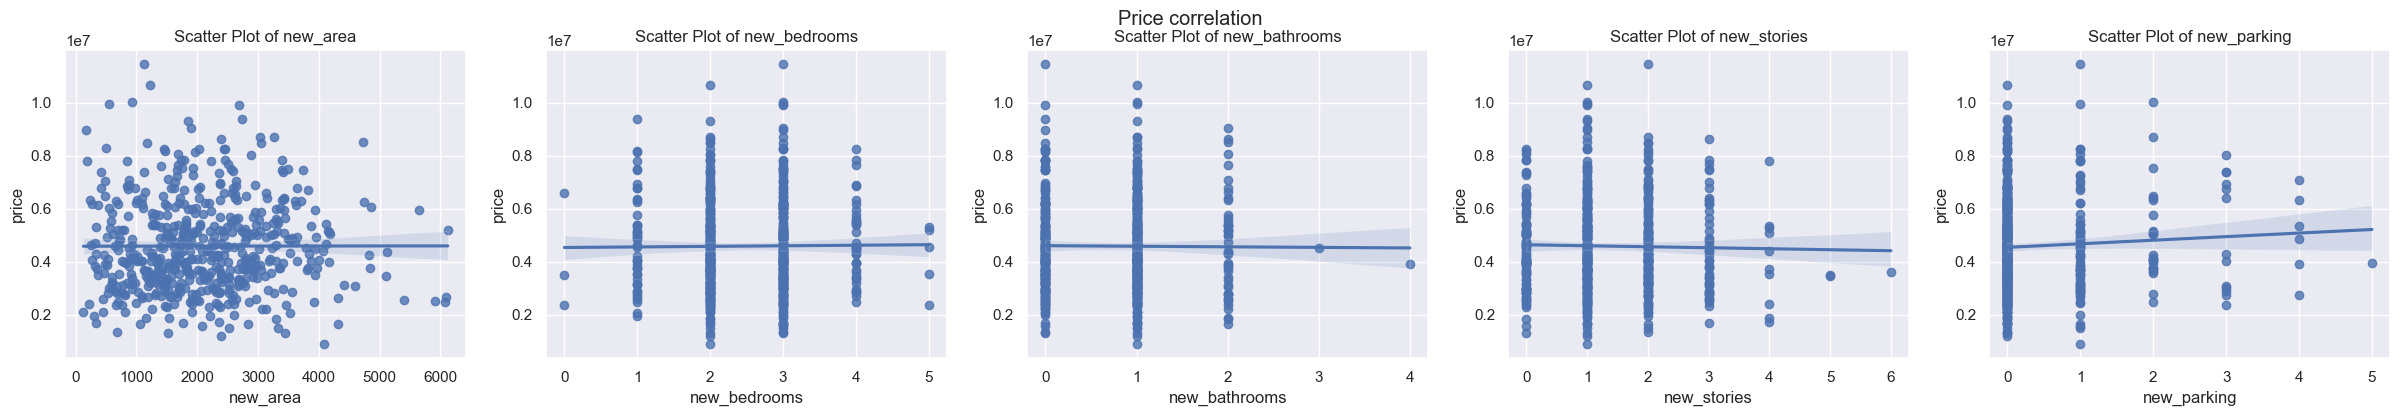

In [55]:
num_variables = ['new_area', 'new_bedrooms', 'new_bathrooms', 'new_stories', 'new_parking']

fig, axes = plt.subplots(1, len(num_variables), figsize=(30, 4))
axes = axes.flatten()

for i, col in enumerate(num_variables):
    sns.regplot(data=new_df, x=col, y='new_price', ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('price')


plt.suptitle('Price correlation')
plt.savefig('Simulated scatterplot with regression of Numerical Variable')
plt.show()

The visual comparison of correlation matrices between the original and simulated datasets reveals notable disparities. These discrepancy suggests that the simulated dataset may not fully capture the complex relationships present in the original data. While the simulated dataset was generated with an attempt to mimic the statistical properties of the original data, the inherent randomness in the generation process may lead to variations in the correlation structures.
Throughout the analysis, assumptions were made regarding the appropriate distribution for each variable. These assumptions play a critical role in the simulation process. Any deviation between the assumed distributions and the true distributions in the original data can significantly affect the resulting correlation matrix.
If the distributions assumed during the simulation do not accurately represent the actual distributions in the original dataset, it introduces discrepancies in the relationships between variables. Creating a perfectly matching dataset through simulation can be challenging, especially when dealing with real-world data that often exhibits intricate patterns and dependencies. The simulation provides an approximation, and the observed differences in correlations underscore the complexity of reproducing the intricate relationships present in the original dataset. 

#### Conclusions



The primary objective of this project was to create a dataset by simulating a real-world phenomenon, that in this case specifically related to a real estate phenomenon.  The focus was on understanding the factors that contribute significantly to the increase in property prices. The process involved data exploration, where the dataset was thoroughly examined to gain insights into its characteristics. The subsequent analysis involved categorizing the variables into two main types: categorical and numerical. Visualizing the probability distribution of these variables was a crucial step in comprehending their underlying patterns. Following this, a new dataset with similar characteristics to the original one was simulated using Python and the `numpy.random` package.

A challenge arose in this process due to the limited number of data points in the original dataset, resulting in constraints on simulating a diverse set of data points. The randomness inherent in the simulation, combined with the limited sample size, posed challenges in precisely determining the probability distribution for each variable. Despite efforts to fit the simulated dataset to the most common distributions, the correlation between the original and simulated datasets remained relatively low. This discrepancy highlighted the complexity of understanding the true probability distribution of each variable.

In essence, this project provided a valuable opportunity to explore and experience the intricacies of real-world phenomena, emphasizing the challenges and nuances associated with simulating and understanding complex datasets.

### References

[1]: Chugh v., (2023). "*Python pandas tutorial: The ultimate guide for beginners*".[Datacamp](https://www.datacamp.com/tutorial/pandas)

[2]: matplotlib, (n.d.). "*matplotlib.pyplot*". [matplotlib](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)

[3]: Zach, (2021). "*The Easiest Way to Use NumPy: import numpy as np*". [Statology](https://www.statology.org/import-numpy-as-np/#:~:text=The%20import%20numpy%20portion%20of,function_name%20rather%20than%20numpy.)

[4]: Scipy, (n.d.). "*Statistical functions (scipy.stats)*". [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)

[5]: Seaborn, (n.d.). "*An introduction to seaborn*". [Seaborn](https://seaborn.pydata.org/tutorial/introduction.html)

[7]: Analyseup, (n.d.). "*Importing Data with Pandas*". [Analyseup](https://www.analyseup.com/learn-python-for-data-science/python-pandas-importing-data.html)

[8]: Shazra H., (2023). "*head () and tail () Functions Explained with Examples and Codes*". [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2023/07/head-and-tail-functions/)

[9]: Pandas, (n.d.). "*pandas.DataFrame.shape*".[Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html)

[10]: Rajan S., (2023). "*Python | Pandas dataframe.info()*". [geeksforgeeks](https://www.geeksforgeeks.org/python-pandas-dataframe-info/)

[11]: Moffitt C., (2018). "*Overview of Pandas Data Types*". [Practical Business Python](https://pbpython.com/pandas_dtypes.html#:~:text=An%20object%20is%20a%20string,df)

[12]: Welck Aj, (n.d.). "*How to Check If Any Value is NaN in a Pandas DataFrame*". [Chartio](https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/)

[13]: Data to Fish, (2021). "*Select all Rows with NaN Values in Pandas DataFrame*". [Data to Fish](https://datatofish.com/rows-with-nan-pandas-dataframe/)

[14]: note.nkmk.me, (2021). "*pandas: Find and remove duplicate rows of DataFrame, Series*". [note.nkmk.me](https://note.nkmk.me/en/python-pandas-duplicated-drop-duplicates/#:~:text=You%20can%20count%20the%20number,counted%20with%20sum()%20method.&text=If%20you%20want%20to%20count,count%20True%20with%20sum()%20)

[15]:Shashank S., (2023). "*Defining, Analysing, and Implementing Imputation Techniques*". [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2021/06/defining-analysing-and-implementing-imputation-techniques/)

[16]: Kirch, Wilhelm, ed. (2008). "*Level of Measurement*". Encyclopedia of Public Health. [Springer Link](https://link.springer.com/referenceworkentry/10.1007/978-1-4020-5614-7_1971)

[17]: DATAtab Team (2023). "*Level of measurement*". [DATAtab: Online Statistics Calculator](https://datatab.net/tutorial/level-of-measurement)

[18]: GraphPad, (n.d.). "*What is the difference between ordinal, interval and ratio variables? Why should I care?*". [GraphPad](https://www.graphpad.com/support/faq/what-is-the-difference-between-ordinal-interval-and-ratio-variables-why-should-i-care/)

[19]: Stevens S.S., (1946). "*On the Theory of Scales of Measurement*". Science, Volum. 103, No. 2684

[20]: Bhat A., (n.d.). "*Levels of Measurement: Nominal, Ordinal, Interval & Ratio*". [QuestionPro](https://www.questionpro.com/blog/nominal-ordinal-interval-ratio/)

[21]: Statgraphics19, (n.d.). "*Categorical Data Analysis*". [Statgraphics19](https://www.statgraphics.com/categorical-data-analysis#:~:text=The%20Frequency%20Tables%20procedure%20analyzes,a%20set%20of%20multinomial%20probabilities.)

[22]: Ebner J., (2020). "*How to Use Pandas Unique to Get Unique Values*". [Sharp Sight](https://www.sharpsightlabs.com/blog/pandas-unique/)

[23]: Zach, (2021). "*What is a Categorical Distribution?*". [Statology](https://www.statology.org/categorical-distribution/)

[24]: Statistics How to, (n.d.). "*Multinomial Distribution: Definition, Examples*". [Statistics How to](https://www.statisticshowto.com/multinomial-distribution/)

[25]: CueMath, (n.d.). "*Binomial Distribution*". [CueMath](https://www.cuemath.com/algebra/binomial-distribution/)

[26]: Third Space Learning, (n.d.). "*How to Calculate Probability*". [Third Space Learning](https://thirdspacelearning.com/gcse-maths/probability/how-to-calculate-probability/)

[27]: Wergieluk J., (2020). "*Histograms vs. KDEs Explained*". [Towards Data Science](https://towardsdatascience.com/histograms-vs-kdes-explained-ed62e7753f12)

[28]:  W3 School, (n.d.). "*Pandas DataFrame describe() Method*". [W3 School](https://www.w3schools.com/python/pandas/ref_df_describe.asp#:~:text=The%20describe()%20method%20returns,std%20%2D%20The%20standard%20deviation)

[29]: Mahadevan M., (2023). "*Step-by-Step Exploratory Data Analysis (EDA) using Python*". [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/)

[30]: pyshark, (n.d.). "*Skewness in Python*". [pyshark](https://pyshark.com/skewness-in-python/)

[31]: Gemini, (n.d.). "*Three challenges of data visualization*". [Gemini](https://www.geminidata.com/3-challenges-of-data-viz/)

[32]: Raoniar R., (2021). "*Finding the Best Distribution that Fits Your Data using Python’s Fitter Library*". [OneZeroBlog](https://onezero.blog/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library/)

[33]: Frost Jim, (n.d.). "*Gamma Distribution: Uses, Parameters & Examples*". [Statistics by Jim](https://statisticsbyjim.com/probability/gamma-distribution/#:~:text=The%20gamma%20distribution%20is%20a,%2C%20insurance%20claims%2C%20and%20rainfall.)

[33]: Kumar A., (2022). "*Normal Distribution Explained with Python Examples*". [Analytics Yogi](https://vitalflux.com/normal-distribution-explained-python-examples/)

[34]: Numpy, (n.d.). "*numpy.random.rayleigh*". [Numpy](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rayleigh.html) 

[35]: Yi M., (n.d.). "*A Complete Guide to Box Plots*". [Chartio](https://chartio.com/learn/charts/box-plot-complete-guide/#:~:text=When%20you%20should%20use%20a,skew%2C%20variance%2C%20and%20outliers.)

[36]: Gudikandula P., (2018). "*Exploratory Data Analysis(beginner) , Univariate, Bivariate and Multivariate — Habberman dataset*". [Medium](https://purnasaigudikandula.medium.com/exploratory-data-analysis-beginner-univariate-bivariate-and-multivariate-habberman-dataset-2365264b751)

[37]: Wongsim W., (2021). "*Scatter Plot ,visualization and relationship in Python*". [Medium](https://medium.com/@row3no6/scatter-plot-visualization-and-relationship-in-python-39729bb0e4df)

[38]: Seaborn, (n.d.). "*Estimating regression fits*". [seaborn](https://seaborn.pydata.org/tutorial/regression.html)

[39]: Zach, (2020). "*How to Calculate Correlation in Python*". [Statology](https://www.statology.org/correlation-in-python/)

[40]: Paaradkar M., (2022). "*Creating Heatmap Using Python Seaborn*". [quantinsti](https://blog.quantinsti.com/creating-heatmap-using-python-seaborn/)

[41]: Li L., (2019). "*How to Perform Exploratory Data Analysis with Seaborn*". [towardsdatascience](https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d#:~:text=Analyzing%20Relationships%20Between%20Numerical%20and,used%20to%20visualize%20conditional%20relationships.)

[42]: Pandas, (n.d.). "*pandas.DataFrame*". [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

[43]: Pandas, (n.d.). "*numpy.random.choice*". [Pandas](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)

[44]: Sekan, F., (2023). "*3 ways how to update data type of columns in Pandas*". [Medium](https://medium.com/@filip.sekan/3-ways-how-to-update-data-type-of-columns-in-pandas-97ddb5f32ae4#:~:text=Using%20the%20astype()%20Method,with%20the%20updated%20data%20type.)

### Additional readings

- Stackoverflow, (2020). "*Python how to fix year out of range error*".[stackoverflow](https://stackoverflow.com/questions/62130640/python-how-to-fix-year-out-of-range-error)
- Stackoverflow, (2017). "*Understanding inplace=True in pandas*". [Stackoverflow](https://stackoverflow.com/questions/43893457/understanding-inplace-true-in-pandas)
- matplotlib, (n.d.). "*matplotlib.pyplot.pie*". [matplotlib](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.pie.html)
- Amipara K., (2017). "*Better visualization of Pie charts by MatPlotLib*".[Medium](https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f)
- Stackoverflow, (2020). "*How to plot 3 plots simultaneously in one plot?*". [Stackoverflow](https://stackoverflow.com/questions/61547691/how-to-plot-3-plots-simultaneously-in-one-plot)
- Numpy (n.d.). "*numpy.random.multinomial*". [Numpy](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multinomial.html)
- Numpy (n.d.). "*numpy.random.binomial*". [Numpy](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html)
- Gokhale S., (2023). "*How To Print A Percentage Value In Python?*". [Ask Python](https://www.askpython.com/python/examples/print-a-percentage-value-in-python)
- parasmadan15, (n.d.). "*Display the Pandas DataFrame in table style*". [Geeks for Geeks](https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-table-style/)
- Stack Overflow, (2011). "*How to put the legend outside the plot*".[Stack Overflow](https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot)
- Kartikaybhutani, (n.d.)"*Python | Pandas DataFrame.isin()*". [Geeks for Geeks](https://www.geeksforgeeks.org/python-pandas-dataframe-isin/)
- Solomon B., (2022). "*pandas GroupBy: Your Guide to Grouping Data in Python*". [Real Python](https://realpython.com/pandas-groupby/)
- Mishra S., (2021). "*Resample function of Pandas*". [towardsdatascience](https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78)
- Brydon M., (2021). "*7. Correlation and Scatterplots*". [sfu](https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html)
- Texas Gateway, (n.d.) "*Introduction to Scatterplots*". [texasgateway](https://www.texasgateway.org/resource/interpreting-scatterplots#:~:text=If%20the%20data%20points%20make,variables%20have%20a%20negative%20correlation)
- deepanshu_rustagi (n.d.). "*Python – seaborn.regplot() method*". [Geeks for Geeks](https://www.geeksforgeeks.org/python-seaborn-regplot-method/)
- Mohit Gupta, (n.d.). "*Exploring Correlation in Python*". [Geeks for Geeks](https://www.geeksforgeeks.org/exploring-correlation-in-python/)
- Stojiljkovic M., (2019). "*NumPy, SciPy, and pandas: Correlation With Python*". [Real Python](https://realpython.com/numpy-scipy-pandas-correlation-python/)
- Luc A., (2019). "*Python Data Visualization — Heatmaps*"[Medium](https://medium.com/@rokaandy/python-data-visualization-heatmaps-79fa7506c410)
- Yi M., (n.d.). "*A Complete Guide to Histograms*". [Chartio](https://chartio.com/learn/charts/histogram-complete-guide/)
- labxchange, (2021). "*How to Interpret Histograms*". [labxchange](https://www.labxchange.org/library/items/lb:LabXchange:10d3270e:html:1)
- Stack Overflow, (2010). "*Fitting a gamma distribution with (python) Scipy*". [Stack Overflow](https://stackoverflow.com/questions/2896179/fitting-a-gamma-distribution-with-python-scipy#2896284)
- Stack Overflow, (2013). "*Fitting a Normal distribution to 1D data*". [Stack Overflow](https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data)
- Andrea Minini, (n.d.). "*La funzione linspace() di Numpy*". [Andrea Minini](https://www.andreaminini.com/python/numpy/funzione-linspace-numpy)
- Stack Overflow, (2019). "*How to generate random categorical data in python according to a probability distribution? [closed]*"[Stack Overflow](https://stackoverflow.com/questions/57435469/how-to-generate-random-categorical-data-in-python-according-to-a-probability-dis)
- Stack Overflow, (2017). "*Remove the extra plot in the matplotlib subplot*". [Stack Overflow](https://stackoverflow.com/questions/44980658/remove-the-extra-plot-in-the-matplotlib-subplot)
- Stack Overflow, (2020). "*python: rayleigh fit (histogram)*". [Stack Overflow](https://stackoverflow.com/questions/63637144/python-rayleigh-fit-histogram)

***
End